In [348]:
import sys, os
from pathlib import Path
# from html.parser import HTMLParser
import textwrap
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

from tabulate import tabulate
from tqdm.notebook import tqdm
import yfinance as yf

# from src import *

In [36]:
raw = '''LIN	Linde PLC	9.42
SAP	SAP SE	8.44
SIE	Siemens AG	7.70
ALV	Allianz SE	6.75
AIR	Airbus SE	4.78
BAS	Basf SE	4.54
DAI	Daimler AG	4.30
DTE	Deutsche Telekom AG	4.21
BAYN	Bayer AG	3.87
DPW	Deutsche Post AG	3.76
IFX	Infineon Technologies AG	3.46
ADS	adidas AG	3.15
MUV2	Munchener Ruckversicherungs-Gesellschaft AG	2.86
VNA	Vonovia SE	2.57
VOW3	Volkswagen AG Participating Preferred	2.45
BMW	Bayerische Motoren Werke AG	2.17
DB1	Deutsche Boerse AG	2.10
DBK	Deutsche Bank AG	1.88
EOAN	E.ON SE	1.85
RWE	RWE AG	1.84
MRK	Merck KGaA	1.83
ZAL	Zalando SE	1.20
SHL	Siemens Healthineers AG Registered Shares	1.17
FRE	Fresenius SE & Co KGaA	1.11
SY1	Symrise AG	1.04
HEN3	Henkel AG & Co KGaA Participating Preferred	0.94
PAH3	Porsche Automobil Holding SE Participating Preferred	0.93
DHER	Delivery Hero SE	0.89
FME	Fresenius Medical Care AG & Co. KGaA	0.88
SRT3	Sartorius AG Participating Preferred	0.87
BNR	Brenntag SE	0.86
1COV	Covestro AG	0.75
HFG	HelloFresh SE Bearer Shares	0.75
QGEN	Qiagen NV	0.73
MTX	MTU Aero Engines AG	0.72
PUM	Puma SE	0.70
ENR	Siemens Energy AG Ordinary Shares	0.68
CON	Continental AG	0.68
HEI	HeidelbergCement AG	0.65
BEI	Beiersdorf AG	0.63'''.split('\n')
rows = [row.split('\t') for row in raw]
rows = [(f'{t}.DE', name, float(num)/100) for t, name, num in rows]
tknames, cnames, amounts = zip(*rows)
amounts = dict(zip(tknames, amounts))
len(rows), sum(amounts.values())

(40, 1.0010999999999997)

In [3]:
tks = [yf.Ticker(t) for t in tknames]
len(tks)

40

In [4]:
infos = [tk.info for tk in tqdm(tks)]
len(infos)

  0%|          | 0/40 [00:00<?, ?it/s]

40

In [444]:
# infos = [{'zip': 'GU2 7XY', 'sector': 'Basic Materials', 'fullTimeEmployees': 72159, 'longBusinessSummary': 'Linde plc operates as an industrial gas company in North and South America, Europe, the Middle East, Africa, and the Asia Pacific. It offers oxygen, nitrogen, argon, rare gases, carbon dioxide, hydrogen, helium, electronic and specialty gases, acetylene, and carbon monoxide. The company also designs and constructs turnkey process plants, such as olefin, natural gas, air separation, hydrogen and synthesis gas, and other plants. It serves healthcare, petroleum refining, manufacturing, food, beverage carbonation, fiber-optics, steel making, aerospace, electronics, chemical, and water treatment industries. The company was founded in 1879 and is based in Guildford, the United Kingdom.', 'city': 'Guildford', 'phone': '44 14 8357 9857', 'country': 'United Kingdom', 'companyOfficers': [], 'website': 'https://www.linde.com', 'maxAge': 1, 'address1': 'The Priestley Centre', 'fax': '44 14 8350 5211', 'industry': 'Specialty Chemicals', 'address2': '10 Priestley Road Surrey Research Park', 'ebitdaMargins': 0.33262002, 'profitMargins': 0.11993, 'grossMargins': 0.43890998, 'operatingCashflow': 8926000128, 'revenueGrowth': 0.119, 'operatingMargins': 0.17499, 'ebitda': 9900999680, 'targetLowPrice': None, 'recommendationKey': 'none', 'grossProfits': 11860000000, 'freeCashflow': 5050500096, 'targetMedianPrice': None, 'currentPrice': 285.25, 'earningsGrowth': 0.424, 'currentRatio': 0.814, 'returnOnAssets': 0.03799, 'numberOfAnalystOpinions': None, 'targetMeanPrice': None, 'debtToEquity': 36.572, 'returnOnEquity': 0.07855, 'targetHighPrice': None, 'totalCash': 4700000256, 'totalDebt': 16727000064, 'totalRevenue': 29767000064, 'totalCashPerShare': 9.17, 'financialCurrency': 'USD', 'revenuePerShare': 57.221, 'quickRatio': 0.626, 'recommendationMean': None, 'exchange': 'GER', 'shortName': 'LINDE PLC  EO 0,001', 'longName': 'Linde plc', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'LIN.DE', 'messageBoardId': 'finmb_318049', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 5.302, 'beta3Year': None, 'enterpriseToEbitda': 15.941, '52WeekChange': 0.34463012, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 512555008, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 86.475, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.79845, 'netIncomeToCommon': 3566000128, 'trailingEps': 6.052, 'lastDividendValue': 1.06, 'SandP52WeekChange': 0.18703341, 'priceToBook': 3.2986412, 'heldPercentInsiders': 0.00204, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 511780773, 'beta': 0.839837, 'enterpriseValue': 157827661824, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1638403200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.399, 'priceToSalesTrailing12Months': 4.9907103, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': None, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 281.7, 'regularMarketOpen': 285.2, 'twoHundredDayAverage': 266.36026, 'trailingAnnualDividendYield': 0.014707135, 'payoutRatio': 0.6102, 'volume24Hr': None, 'regularMarketDayHigh': 285.45, 'navPrice': None, 'averageDailyVolume10Day': 855354, 'regularMarketPreviousClose': 281.7, 'fiftyDayAverage': 291.703, 'trailingAnnualDividendRate': 4.143, 'open': 285.2, 'toCurrency': None, 'averageVolume10days': 855354, 'expireDate': None, 'algorithm': None, 'dividendRate': 3.74, 'exDividendDate': 1638403200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 282.5, 'currency': 'EUR', 'trailingPE': 47.13318, 'regularMarketVolume': 646027, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 148558479360, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 715542, 'dayLow': 282.5, 'ask': 284.6, 'askSize': 25800, 'volume': 646027, 'fiftyTwoWeekHigh': 309.35, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 201.8, 'bid': 284.45, 'tradeable': False, 'dividendYield': 0.013300001, 'bidSize': 13000, 'dayHigh': 285.45, 'regularMarketPrice': 285.25, 'logo_url': 'https://logo.clearbit.com/linde.com'}, {'zip': '69190', 'sector': 'Technology', 'fullTimeEmployees': 107415, 'longBusinessSummary': 'SAP SE operates as an enterprise application software company worldwide. The company operates through four segments: Applications, Technology & Support; Concur; Qualtrics; and Services. It offers SAP S/4HANA, an enterprise resource planning suite for intelligent technologies; SAP Integrated Business Planning for Supply Chain, a cloud-based solution that delivers real-time supply chain planning capabilities; SAP Intelligent Asset Management, a solution that helps to define, plan, and monitor service and maintenance strategy; SAP SuccessFactors Human Experience Management Suite, a cloud software that helps to develop, manage, and engage people; SAP Ariba, a digital business-to-business marketplace; SAP Concur, a travel and expense management software; and SAP Fieldglass, a cloud application for services procurement and contingent workforce management. The company also provides SAP solutions for enterprise information management that offers capabilities to understand, integrate, cleanse, manage, associate, and archive data; SAP HANA and SAP HANA Cloud, which enables businesses to process and analyze live data; SAP Analytics Cloud, a cloud analytics solution; SAP BusinessObjects Business Intelligence, a suite of flexible and scalable self-service BI tools; SAP Data Warehouse Cloud, a cloud data warehouse solution for business and IT users; and SAP BW/4HANA, an on-premise data warehouse solution. In addition, it offers SAP Integration Suite that help customers with holistic integration, and API-based and event-based integrations; SAP Extension Suite that provides ready-to-use services to accelerate and develop application extensions; SAP Internet of Things, a cloud solution that generates business outcomes; and SAP Intelligent Robotic Process Automation, a software robot to mimic human actions and responses. SAP SE was founded in 1972 and is headquartered in Walldorf, Germany.', 'city': 'Walldorf', 'phone': '49 6227 7 47474', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.sap.com', 'maxAge': 1, 'address1': 'Dietmar-Hopp-Allee 16', 'fax': '49 6227 7 57575', 'industry': 'Software—Application', 'ebitdaMargins': 0.2563, 'profitMargins': 0.18902999, 'grossMargins': 0.72261, 'operatingCashflow': 6208000000, 'revenueGrowth': 0.059, 'operatingMargins': 0.19254999, 'ebitda': 7136000000, 'targetLowPrice': 100, 'recommendationKey': 'buy', 'grossProfits': 20119000000, 'freeCashflow': 7353625088, 'targetMedianPrice': 135.5, 'currentPrice': 112.1, 'earningsGrowth': -0.231, 'currentRatio': 1.249, 'returnOnAssets': 0.05169, 'numberOfAnalystOpinions': 32, 'targetMeanPrice': 136.5, 'debtToEquity': 37.407, 'returnOnEquity': 0.15047, 'targetHighPrice': 160, 'totalCash': 11655999488, 'totalDebt': 15569999872, 'totalRevenue': 27842000896, 'totalCashPerShare': 9.878, 'financialCurrency': 'EUR', 'revenuePerShare': 23.595, 'quickRatio': 1.147, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'SAP SE', 'longName': 'SAP SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'SAP.DE', 'messageBoardId': 'finmb_126475', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 5.025, 'beta3Year': None, 'enterpriseToEbitda': 19.607, '52WeekChange': 0.038984895, 'morningStarRiskRating': None, 'forwardEps': 5.78, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 1179580032, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 33.016, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1640908800, 'heldPercentInstitutions': 0.3559, 'netIncomeToCommon': 5263000064, 'trailingEps': 4.46, 'lastDividendValue': 1.85, 'SandP52WeekChange': 0.18703341, 'priceToBook': 3.3953235, 'heldPercentInsiders': 0.11093, 'nextFiscalYearEnd': 1703980800, 'yield': None, 'mostRecentQuarter': 1640908800, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 1043143600, 'beta': 1.003785, 'enterpriseValue': 139918000128, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 961977600, 'lastSplitFactor': '3:1', 'legalType': None, 'lastDividendDate': 1620864000, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': -0.234, 'priceToSalesTrailing12Months': 4.7493324, 'dateShortInterest': None, 'pegRatio': 4.81, 'ytdReturn': None, 'forwardPE': 19.394463, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 113, 'regularMarketOpen': 113.4, 'twoHundredDayAverage': 120.7243, 'trailingAnnualDividendYield': 0.016371682, 'payoutRatio': 0.4056, 'volume24Hr': None, 'regularMarketDayHigh': 113.86, 'navPrice': None, 'averageDailyVolume10Day': 3353048, 'regularMarketPreviousClose': 113, 'fiftyDayAverage': 119.7192, 'trailingAnnualDividendRate': 1.85, 'open': 113.4, 'toCurrency': None, 'averageVolume10days': 3353048, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.85, 'exDividendDate': 1620864000, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 112.04, 'currency': 'EUR', 'trailingPE': 25.13453, 'regularMarketVolume': 2335910, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 132230922240, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 2122362, 'dayLow': 112.04, 'ask': 112.2, 'askSize': 56500, 'volume': 2335910, 'fiftyTwoWeekHigh': 129.74, 'fromCurrency': None, 'fiveYearAvgDividendYield': 1.4, 'fiftyTwoWeekLow': 100.46, 'bid': 112.18, 'tradeable': False, 'dividendYield': 0.0164, 'bidSize': 76700, 'dayHigh': 113.86, 'regularMarketPrice': 112.1, 'logo_url': 'https://logo.clearbit.com/sap.com'}, {'zip': '80333', 'sector': 'Industrials', 'fullTimeEmployees': 303000, 'longBusinessSummary': 'Siemens Aktiengesellschaft, a technology company, focuses in the areas of automation and digitalization in Europe, Commonwealth of Independent States, Africa, the Middle East, the Americas, Asia, and Australia. It operates through Digital Industries, Smart Infrastructure, Mobility, Siemens Healthineers, and Siemens Financial Services segments. The Digital Industries segment offers automation systems and software for factories, numerical control systems, motors, drives and inverters, and integrated automation systems for machine tools and production machines; process control systems, machine-to-machine communication products, sensors and radio frequency identification systems; software for production and product lifecycle management, and simulation and testing of mechatronic systems; and cloud-based industrial Internet of Things operating systems. The Smart Infrastructure segment offers products, systems, solutions, services, and software to support sustainable transition in energy generation from fossil and renewable sources; sustainable buildings and communities; and buildings, electrification, and electrical products. The Mobility segment provides passenger and freight transportation, such as vehicles, trams and light rail, and commuter trains, as well as trains and passenger coaches; locomotives for freight or passenger transport and solutions for automated transportation; products and solutions for rail automation; electrification products; and intermodal solutions. The Siemens Healthineers segment develops, manufactures, and sells various diagnostic and therapeutic products and services; and provides clinical consulting services. The Siemens Financial Services segment offers debt and equity investments; leasing, lending, and working capital financing solutions; and equipment, project, and structured financing solutions. Siemens Aktiengesellschaft was founded in 1847 and is headquartered in Munich, Germany.', 'city': 'Munich', 'phone': '49 89 636 00', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.siemens.com', 'maxAge': 1, 'address1': 'Werner-von-Siemens-Strasse 1', 'fax': '49 69 797 6664', 'industry': 'Specialty Industrial Machinery', 'ebitdaMargins': 0.13752, 'profitMargins': 0.098950006, 'grossMargins': 0.36518002, 'operatingCashflow': 9996000256, 'revenueGrowth': 0.177, 'operatingMargins': 0.103140004, 'ebitda': 8562999808, 'targetLowPrice': 114, 'recommendationKey': 'buy', 'grossProfits': 22738000000, 'freeCashflow': 5674375168, 'targetMedianPrice': 180, 'currentPrice': 140.52, 'earningsGrowth': -0.337, 'currentRatio': 1.31, 'returnOnAssets': 0.03046, 'numberOfAnalystOpinions': 24, 'targetMeanPrice': 174.83, 'debtToEquity': 98.835, 'returnOnEquity': 0.12651, 'targetHighPrice': 205, 'totalCash': 10677000192, 'totalDebt': 48699998208, 'totalRevenue': 62264999936, 'totalCashPerShare': 13.307, 'financialCurrency': 'EUR', 'revenuePerShare': 77.654, 'quickRatio': 0.868, 'recommendationMean': 2, 'exchange': 'GER', 'shortName': 'SIEMENS AG', 'longName': 'Siemens Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'SIE.DE', 'messageBoardId': 'finmb_394038', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 2.506, 'beta3Year': None, 'enterpriseToEbitda': 18.219, '52WeekChange': 0.036323547, 'morningStarRiskRating': None, 'forwardEps': 8.71, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 802355008, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 55.303, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1632960000, 'heldPercentInstitutions': 0.35195, 'netIncomeToCommon': 5098999808, 'trailingEps': 7.586, 'lastDividendValue': 4, 'SandP52WeekChange': 0.18703341, 'priceToBook': 2.540911, 'heldPercentInsiders': 0.06, 'nextFiscalYearEnd': 1696032000, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 802299254, 'beta': 1.089237, 'enterpriseValue': 156007972864, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1644537600, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': -0.336, 'priceToSalesTrailing12Months': 1.8107593, 'dateShortInterest': None, 'pegRatio': 0.96, 'ytdReturn': None, 'forwardPE': 16.13318, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 140.94, 'regularMarketOpen': 141.74, 'twoHundredDayAverage': 141.7306, 'trailingAnnualDividendYield': 0.02838087, 'payoutRatio': 0.5573, 'volume24Hr': None, 'regularMarketDayHigh': 142.42, 'navPrice': None, 'averageDailyVolume10Day': 1796480, 'regularMarketPreviousClose': 140.94, 'fiftyDayAverage': 147.9628, 'trailingAnnualDividendRate': 4, 'open': 141.74, 'toCurrency': None, 'averageVolume10days': 1796480, 'expireDate': None, 'algorithm': None, 'dividendRate': 4, 'exDividendDate': 1644537600, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 140.52, 'currency': 'EUR', 'trailingPE': 18.523596, 'regularMarketVolume': 1235051, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 112746930176, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 1410090, 'dayLow': 140.52, 'ask': 140.84, 'askSize': 100000, 'volume': 1235051, 'fiftyTwoWeekHigh': 157.96, 'fromCurrency': None, 'fiveYearAvgDividendYield': 3.3, 'fiftyTwoWeekLow': 124.96, 'bid': 140.8, 'tradeable': False, 'dividendYield': 0.028399998, 'bidSize': 44200, 'dayHigh': 142.42, 'regularMarketPrice': 140.52, 'logo_url': 'https://logo.clearbit.com/siemens.com'}, {'zip': '80802', 'sector': 'Financial Services', 'fullTimeEmployees': 150269, 'longBusinessSummary': "Allianz SE, together with its subsidiaries, provides property-casualty insurance, life/health insurance, and asset management products and services worldwide. The company's Property-Casualty segment offers various insurance products, including motor liability and own damage, accident, general liability, fire and property, legal expense, credit, and travel to private and corporate customers. Its Life/Health segment provides a range of life and health insurance products on an individual and a group basis, such as annuities, endowment and term insurance, and unit-linked and investment-oriented products, as well as private and supplemental health, and long-term care insurance products. The company's Asset Management segment offers institutional and retail asset management products and services to third-party investors comprising equity and fixed income funds, and multi-assets; and alternative investment products comprising infrastructure debt/equity, real assets, liquid alternatives, and solutions. Its Corporate and Other segment provides banking services for retail clients, as well as digital investment management services. Allianz SE was founded in 1890 and is headquartered in Munich, Germany.", 'city': 'Munich', 'phone': '49 89 3800 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.allianz.com', 'maxAge': 1, 'address1': 'KOeniginstrasse 28', 'industry': 'Insurance—Diversified', 'ebitdaMargins': 0.14246, 'profitMargins': 0.07275, 'grossMargins': 0.22902, 'operatingCashflow': None, 'revenueGrowth': 0.038, 'operatingMargins': 0.13282, 'ebitda': 17074750464, 'targetLowPrice': 200, 'recommendationKey': 'buy', 'grossProfits': 27923000000, 'freeCashflow': None, 'targetMedianPrice': 246, 'currentPrice': 227.05, 'earningsGrowth': 0.025, 'currentRatio': 0.97, 'returnOnAssets': 0.00939, 'numberOfAnalystOpinions': 20, 'targetMeanPrice': 245.22, 'debtToEquity': 42.465, 'returnOnEquity': 0.11233, 'targetHighPrice': 281, 'totalCash': 21936001024, 'totalDebt': 36252999680, 'totalRevenue': 119851999232, 'totalCashPerShare': 52.892, 'financialCurrency': 'EUR', 'revenuePerShare': 288.442, 'quickRatio': 0.417, 'recommendationMean': 1.9, 'exchange': 'GER', 'shortName': 'ALLIANZ SE', 'longName': 'Allianz SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'ALV.DE', 'messageBoardId': 'finmb_598807', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 0.937, 'beta3Year': None, 'enterpriseToEbitda': 6.574, '52WeekChange': 0.17608988, 'morningStarRiskRating': None, 'forwardEps': 22.7, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 408457984, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 196.849, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.39898, 'netIncomeToCommon': 8718999552, 'trailingEps': 20.875, 'lastDividendValue': 9.6, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.1534222, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 414726479, 'beta': 1.363439, 'enterpriseValue': 112256000000, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1620259200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.023, 'priceToSalesTrailing12Months': 0.7737909, 'dateShortInterest': None, 'pegRatio': 1.44, 'ytdReturn': None, 'forwardPE': 10.002202, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 227.15, 'regularMarketOpen': 226.85, 'twoHundredDayAverage': 207.0732, 'trailingAnnualDividendYield': 0.042262826, 'payoutRatio': 0.46150002, 'volume24Hr': None, 'regularMarketDayHigh': 228.6, 'navPrice': None, 'averageDailyVolume10Day': 1097320, 'regularMarketPreviousClose': 227.15, 'fiftyDayAverage': 211.653, 'trailingAnnualDividendRate': 9.6, 'open': 226.85, 'toCurrency': None, 'averageVolume10days': 1097320, 'expireDate': None, 'algorithm': None, 'dividendRate': 9.6, 'exDividendDate': 1620259200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 226.05, 'currency': 'EUR', 'trailingPE': 10.876647, 'regularMarketVolume': 721742, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 92740386816, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 898067, 'dayLow': 226.05, 'ask': 227.2, 'askSize': 10000, 'volume': 721742, 'fiftyTwoWeekHigh': 230.05, 'fromCurrency': None, 'fiveYearAvgDividendYield': 4.52, 'fiftyTwoWeekLow': 182.52, 'bid': 227.1, 'tradeable': False, 'dividendYield': 0.0423, 'bidSize': 214900, 'dayHigh': 228.6, 'regularMarketPrice': 227.05, 'logo_url': 'https://logo.clearbit.com/allianz.com'}, {'zip': '2333 CS', 'sector': 'Industrials', 'fullTimeEmployees': 125888, 'longBusinessSummary': "Airbus SE designs, manufactures, and distributes aerospace products and solutions in the Netherlands and internationally. The company operates through three segments: Airbus, Airbus Helicopters, and Airbus Defence and Space. The company's Airbus segment develops, manufactures, markets, and sells commercial jet aircraft of approximately 100 seats; and regional turboprop aircraft and aircraft components, as well as provides aircraft conversion and related services. Its Airbus Helicopters segment develops, manufactures, markets, and sells civil and military helicopters; and provides helicopter related services. The company's Airbus Defence and Space segment designs, develops, delivers, and supports military aircraft, such as combat, mission, transport, and tanker aircraft; and provides unmanned aerial systems and their associated services. It also offers civil and defense space systems for telecommunications, earth observations, navigation, science, and orbital systems; missile systems; and missile and space launcher systems, as well as services around data processing from platforms, secure communication, and cyber security. The company was formerly known as Airbus Group SE and changed its name to Airbus SE in April 2017. Airbus SE was incorporated in 1998 and is headquartered in Leiden, the Netherlands.", 'city': 'Leiden', 'phone': '31 71 524 5600', 'country': 'Netherlands', 'companyOfficers': [], 'website': 'https://www.airbus.com', 'maxAge': 1, 'address1': 'Mendelweg 30', 'industry': 'Aerospace & Defense', 'ebitdaMargins': 0.14035, 'profitMargins': 0.07627, 'grossMargins': 0.19123, 'operatingCashflow': 8812999680, 'revenueGrowth': -0.062, 'operatingMargins': 0.10465, 'ebitda': 7705999872, 'targetLowPrice': 135, 'recommendationKey': 'strong_buy', 'grossProfits': 6588000000, 'freeCashflow': 7693374976, 'targetMedianPrice': 138, 'currentPrice': 113.12, 'earningsGrowth': None, 'currentRatio': 1.149, 'returnOnAssets': 0.03243, 'numberOfAnalystOpinions': 3, 'targetMeanPrice': 137.67, 'debtToEquity': 169.502, 'returnOnEquity': 0.76808, 'targetHighPrice': 140, 'totalCash': 16652999680, 'totalDebt': 14922999808, 'totalRevenue': 54905999360, 'totalCashPerShare': 21.193, 'financialCurrency': 'EUR', 'revenuePerShare': 69.962, 'quickRatio': 0.499, 'recommendationMean': 1, 'exchange': 'GER', 'shortName': 'AIRBUS SE', 'longName': 'Airbus SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'AIR.DE', 'messageBoardId': 'finmb_561001', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.618, 'beta3Year': None, 'enterpriseToEbitda': 11.531, '52WeekChange': 0.28323317, 'morningStarRiskRating': None, 'forwardEps': 4.79, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 785848000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 11.182, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.31513, 'netIncomeToCommon': 4188000000, 'trailingEps': 5.326, 'lastDividendValue': 1.8, 'SandP52WeekChange': 0.18703341, 'priceToBook': 10.116259, 'heldPercentInsiders': 0.25839, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 582007658, 'beta': 1.964845, 'enterpriseValue': 88856625152, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1587340800, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 1.6215721, 'dateShortInterest': None, 'pegRatio': -4.64, 'ytdReturn': None, 'forwardPE': 23.615868, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 115.26, 'regularMarketOpen': 114.9, 'twoHundredDayAverage': 110.41465, 'trailingAnnualDividendYield': 0.01431546, 'payoutRatio': 0, 'volume24Hr': None, 'regularMarketDayHigh': 115.56, 'navPrice': None, 'averageDailyVolume10Day': 514136, 'regularMarketPreviousClose': 115.26, 'fiftyDayAverage': 110.0888, 'trailingAnnualDividendRate': 1.65, 'open': 114.9, 'toCurrency': None, 'averageVolume10days': 514136, 'expireDate': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': 1587340800, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 112.92, 'currency': 'EUR', 'trailingPE': 21.239204, 'regularMarketVolume': 636757, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 89034039296, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 435031, 'dayLow': 112.92, 'ask': 113.24, 'askSize': 52700, 'volume': 636757, 'fiftyTwoWeekHigh': 121.06, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 88.63, 'bid': 113.22, 'tradeable': False, 'dividendYield': None, 'bidSize': 21500, 'dayHigh': 115.56, 'regularMarketPrice': 113.12, 'logo_url': 'https://logo.clearbit.com/airbus.com'}, {'zip': '67056', 'sector': 'Basic Materials', 'fullTimeEmployees': 110672, 'longBusinessSummary': 'BASF SE operates as a chemical company worldwide. It operates through six segments: Chemicals, Materials, Industrial Solutions, Surface Technologies, Nutrition & Care, and Agricultural Solutions. The Chemicals segment provides petrochemicals and intermediates. The Materials segment offers advanced materials and their precursors for applications and systems, such as isocyanates and polyamides, as well as inorganic basic products and specialties for plastic and plastic processing industries. The Industrial Solutions segment develops and markets ingredients and additives for industrial applications, such as polymer dispersions, pigments, resins, electronic materials, antioxidants, light stabilizers, oilfield chemicals, mineral processing, and hydrometallurgical chemicals. The Surface Technologies segment offers chemical solutions and automotive OEM which include refinish coatings, surface treatment, catalysts, battery materials, and base metal services for the automotive and chemical industries. The Nutrition & Care segment provides nutrition and care ingredients for food and feed producers, as well as pharmaceutical, cosmetics, detergent, and cleaner industries. The Agricultural Solutions segment offers crop protection products and seeds, such as fungicides, herbicides, insecticides, and biological crop production products, as well as seed treatment products. The company has strategic partnerships with IntelliSense.io; and Contemporary Amperex TechnologyCo., Limited on battery materials solutions, including cathode active materials and battery recycling. BASF SE was founded in 1865 and is headquartered in Ludwigshafen am Rhein, Germany.', 'city': 'Ludwigshafen am Rhein', 'phone': '49 0621 60 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.basf.com', 'maxAge': 1, 'address1': 'Carl-Bosch-Strasse 38', 'fax': '49 0621 60 42525', 'industry': 'Chemicals', 'ebitdaMargins': 0.18406999, 'profitMargins': 0.076009996, 'grossMargins': 0.25119, 'operatingCashflow': 6008999936, 'revenueGrowth': 0.424, 'operatingMargins': 0.13706, 'ebitda': 13754999808, 'targetLowPrice': 62, 'recommendationKey': 'buy', 'grossProfits': 14766000000, 'freeCashflow': 3843624960, 'targetMedianPrice': 80, 'currentPrice': 67.95, 'earningsGrowth': None, 'currentRatio': 1.699, 'returnOnAssets': 0.07397, 'numberOfAnalystOpinions': 26, 'targetMeanPrice': 81.19, 'debtToEquity': 48.7, 'returnOnEquity': 0.15258999, 'targetHighPrice': 114, 'totalCash': 3099000064, 'totalDebt': 19779000320, 'totalRevenue': 74726998016, 'totalCashPerShare': 3.374, 'financialCurrency': 'EUR', 'revenuePerShare': 81.365, 'quickRatio': 1.061, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'BASF SE', 'longName': 'BASF SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'BAS.DE', 'messageBoardId': 'finmb_382826', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.075, 'beta3Year': None, 'enterpriseToEbitda': 5.839, '52WeekChange': 0.027206779, 'morningStarRiskRating': None, 'forwardEps': 5.88, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 918478976, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 42.888, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.28851998, 'netIncomeToCommon': 5376000000, 'trailingEps': 6.175, 'lastDividendValue': 3.3, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.5843592, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 918258565, 'beta': 1.453217, 'enterpriseValue': 80321830912, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1214524800, 'lastSplitFactor': '2:1', 'legalType': None, 'lastDividendDate': 1619740800, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 0.835182, 'dateShortInterest': None, 'pegRatio': 0.38, 'ytdReturn': None, 'forwardPE': 11.556122, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 67.96, 'regularMarketOpen': 68.25, 'twoHundredDayAverage': 65.09885, 'trailingAnnualDividendYield': 0.048557974, 'payoutRatio': 0.5641, 'volume24Hr': None, 'regularMarketDayHigh': 68.68, 'navPrice': None, 'averageDailyVolume10Day': 3721617, 'regularMarketPreviousClose': 67.96, 'fiftyDayAverage': 62.9648, 'trailingAnnualDividendRate': 3.3, 'open': 68.25, 'toCurrency': None, 'averageVolume10days': 3721617, 'expireDate': None, 'algorithm': None, 'dividendRate': 3.3, 'exDividendDate': 1619740800, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 67.79, 'currency': 'EUR', 'trailingPE': 11.004047, 'regularMarketVolume': 2299153, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 62410645504, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 3013973, 'dayLow': 67.79, 'ask': 67.98, 'askSize': 16500, 'volume': 2299153, 'fiftyTwoWeekHigh': 72.88, 'fromCurrency': None, 'fiveYearAvgDividendYield': 4.76, 'fiftyTwoWeekLow': 57.06, 'bid': 68, 'tradeable': False, 'dividendYield': 0.048600003, 'bidSize': 139300, 'dayHigh': 68.68, 'regularMarketPrice': 67.95, 'logo_url': 'https://logo.clearbit.com/basf.com'}, {'zip': '70372', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 289282, 'longBusinessSummary': 'Daimler AG, together its subsidiaries, develops and manufactures passenger cars, trucks, vans, and buses in Germany and internationally. It operates through Mercedes-Benz Cars & Vans, Daimler Trucks and Buses, and Daimler Mobility segments. The Mercedes-Benz Cars segment offers premium and luxury vehicles of the Mercedes-Benz brand, including the Mercedes-AMG, Mercedes-Maybach, and Mercedes-EQ brands; small cars under the smart brand name; and ecosystem of Mercedes-Benz under the Mercedes me brand, as well as vans and related services under the Mercedes-Benz and Freightliner brands. Daimler Trucks and Buses segment offers its trucks and special vehicles under the Mercedes-Benz, Freightliner, Western Star, FUSO, and BharatBenz brands; and buses under the Mercedes-Benz, Setra, Thomas Built Buses, and FU brands, as well as bus chassis. The Daimler Mobility segment provides financing and leasing packages for end-customers and dealers; and automotive insurance brokerage, banking, investment, and fleet management services under the Athlon brand. It also sells vehicle related spare parts and accessories. Daimler AG was founded in 1886 and is headquartered in Stuttgart, Germany', 'city': 'Stuttgart', 'phone': '49 711 170', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.daimler.com', 'maxAge': 1, 'address1': 'Mercedesstrasse 120', 'fax': '49 711 17 22244', 'industry': 'Auto Manufacturers', 'ebitdaMargins': 0.11924, 'profitMargins': 0.08246, 'grossMargins': 0.20969, 'operatingCashflow': 25536000000, 'revenueGrowth': 0.001, 'operatingMargins': 0.092180006, 'ebitda': 20016001024, 'targetLowPrice': 70, 'recommendationKey': 'buy', 'grossProfits': 25435000000, 'freeCashflow': -11712499712, 'targetMedianPrice': 86.5, 'currentPrice': 70.16, 'earningsGrowth': 0.206, 'currentRatio': 1.296, 'returnOnAssets': 0.03333, 'numberOfAnalystOpinions': 24, 'targetMeanPrice': 92.58, 'debtToEquity': 173.659, 'returnOnEquity': 0.17826, 'targetHighPrice': 116, 'totalCash': 21222000640, 'totalDebt': 130713001984, 'totalRevenue': 167868006400, 'totalCashPerShare': 19.837, 'financialCurrency': 'EUR', 'revenuePerShare': 156.915, 'quickRatio': 0.599, 'recommendationMean': 1.8, 'exchange': 'GER', 'shortName': 'DAIMLER AG', 'longName': 'Daimler AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'DAI.DE', 'messageBoardId': 'finmb_106772', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.109, 'beta3Year': None, 'enterpriseToEbitda': 9.3, '52WeekChange': 0.08674097, 'morningStarRiskRating': None, 'forwardEps': 10.66, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 1069800000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 68.87, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.3541, 'netIncomeToCommon': 11537999872, 'trailingEps': 12.94, 'lastDividendValue': 1.35, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.018731, 'heldPercentInsiders': 0.18351, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 753646990, 'beta': 1.465116, 'enterpriseValue': 186140803072, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1617235200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.205, 'priceToSalesTrailing12Months': 0.44712016, 'dateShortInterest': None, 'pegRatio': 0.11, 'ytdReturn': None, 'forwardPE': 6.581614, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 70.16, 'regularMarketOpen': 70, 'twoHundredDayAverage': 75.70496, 'trailingAnnualDividendYield': 0.019241732, 'payoutRatio': 0.1249, 'volume24Hr': None, 'regularMarketDayHigh': 70.92, 'navPrice': None, 'averageDailyVolume10Day': 3285713, 'regularMarketPreviousClose': 70.16, 'fiftyDayAverage': 72.19666, 'trailingAnnualDividendRate': 1.35, 'open': 70, 'toCurrency': None, 'averageVolume10days': 3285713, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.35, 'exDividendDate': 1617235200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 69.7, 'currency': 'EUR', 'trailingPE': 5.421948, 'regularMarketVolume': 2186518, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 75057168384, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 3329121, 'dayLow': 69.7, 'ask': 70.09, 'askSize': 73800, 'volume': 2186518, 'fiftyTwoWeekHigh': 91.63, 'fromCurrency': None, 'fiveYearAvgDividendYield': 5, 'fiftyTwoWeekLow': 60.1, 'bid': 70.08, 'tradeable': False, 'dividendYield': 0.019199999, 'bidSize': 124500, 'dayHigh': 70.92, 'regularMarketPrice': 70.16, 'logo_url': 'https://logo.clearbit.com/daimler.com'}, {'zip': '53113', 'sector': 'Communication Services', 'fullTimeEmployees': 216265, 'longBusinessSummary': 'Deutsche Telekom AG, together with its subsidiaries, provides integrated telecommunication services. The company operates through five segments: Germany, United States, Europe, Systems Solutions, and Group Development. It offers fixed-network services, including voice and data communication services based on fixed-network and broadband technology; and sells terminal equipment and other hardware products, as well as services to resellers. The company also provides mobile voice and data services to consumers and business customers; sells mobile devices and other hardware products; and sells mobile services to resellers and to companies that purchases and markets network services to third parties, such as mobile virtual network operators. In addition, it offers internet services; internet-based TV products and services; and information and communication technology systems for multinational corporations and public sector institutions with an infrastructure of data centers and networks under the T-Systems brand, as well as call center services. The company has 242 million mobile customers and 22 million broadband customers, as well as 27 million fixed-network lines. Deutsche Telekom AG has a collaboration with VMware, Inc. on cloud-based open and intelligent virtual RAN platform to bring agility to radio access networks for existing LTE and future 5G networks; and partnership with Microsoft to deliver high-performance cloud computing experiences. The company was founded in 1995 and is headquartered in Bonn, Germany.', 'city': 'Bonn', 'phone': '49 228 181 88880', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.telekom.com', 'maxAge': 1, 'address1': 'Friedrich-Ebert-Allee 140', 'fax': '49 228 181 88899', 'industry': 'Telecom Services', 'ebitdaMargins': 0.31889, 'profitMargins': 0.048720002, 'grossMargins': 0.40182, 'operatingCashflow': 32917999616, 'revenueGrowth': 0.019, 'operatingMargins': 0.13928, 'ebitda': 35188998144, 'targetLowPrice': 19.5, 'recommendationKey': 'buy', 'grossProfits': 41433000000, 'freeCashflow': 2740875008, 'targetMedianPrice': 22, 'currentPrice': 16.876, 'earningsGrowth': 0.075, 'currentRatio': 0.987, 'returnOnAssets': 0.035669997, 'numberOfAnalystOpinions': 21, 'targetMeanPrice': 22.58, 'debtToEquity': 179.717, 'returnOnEquity': 0.10594, 'targetHighPrice': 27, 'totalCash': 6336999936, 'totalDebt': 141727006720, 'totalRevenue': 110350000128, 'totalCashPerShare': 1.32, 'financialCurrency': 'EUR', 'revenuePerShare': 23.182, 'quickRatio': 0.648, 'recommendationMean': 1.6, 'exchange': 'GER', 'shortName': 'DEUTSCHE TELEKOM AG', 'longName': 'Deutsche Telekom AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'DTE.DE', 'messageBoardId': 'finmb_380011', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 2.3, 'beta3Year': None, 'enterpriseToEbitda': 7.212, '52WeekChange': 0.101278305, 'morningStarRiskRating': None, 'forwardEps': 1.3, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 4986460160, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 8.561, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.43115002, 'netIncomeToCommon': 5376000000, 'trailingEps': 1.129, 'lastDividendValue': 0.64, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.971265, 'heldPercentInsiders': 0.18360001, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 4102176000, 'beta': 0.716062, 'enterpriseValue': 253799006208, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1649376000, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.088, 'priceToSalesTrailing12Months': 0.76258725, 'dateShortInterest': None, 'pegRatio': 1.81, 'ytdReturn': None, 'forwardPE': 12.981539, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 16.8, 'regularMarketOpen': 16.87, 'twoHundredDayAverage': 17.04872, 'trailingAnnualDividendYield': 0.035714287, 'payoutRatio': 0.5263, 'volume24Hr': None, 'regularMarketDayHigh': 16.992, 'navPrice': None, 'averageDailyVolume10Day': 12161579, 'regularMarketPreviousClose': 16.8, 'fiftyDayAverage': 16.13816, 'trailingAnnualDividendRate': 0.6, 'open': 16.87, 'toCurrency': None, 'averageVolume10days': 12161579, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.64, 'exDividendDate': 1649376000, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 16.736, 'currency': 'EUR', 'trailingPE': 14.9477415, 'regularMarketVolume': 8404119, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 84151500800, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 10199155, 'dayLow': 16.736, 'ask': 16.894, 'askSize': 288200, 'volume': 8404119, 'fiftyTwoWeekHigh': 18.918, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 14.595, 'bid': 16.89, 'tradeable': False, 'dividendYield': 0.0381, 'bidSize': 910400, 'dayHigh': 16.992, 'regularMarketPrice': 16.876, 'logo_url': 'https://logo.clearbit.com/telekom.com'}, {'zip': '51368', 'sector': 'Healthcare', 'fullTimeEmployees': 99814, 'longBusinessSummary': "Bayer Aktiengesellschaft operates as a life science company worldwide. It operates through Pharmaceuticals, Consumer Health, and Crop Science segments. The Pharmaceuticals segment offers prescription products primarily for cardiology and women's health care; specialty therapeutics in the areas of oncology, hematology, and ophthalmology; and diagnostic imaging equipment and contrast agents, as well as cell and gene therapy. The Consumer Health segment markets nonprescription over-the-counter medicines, medical products, medicated skincare products, nutritional supplements, and self-care solutions in dermatology, nutritional supplements, pain and cardiovascular risk prevention, digestive health, allergy, and cold and cough. The Crop Science segment offers chemical and biological crop protection products, improved plant traits, seeds, digital solution, and pest and weed control products, as well as customer service for agriculture. This segment also provides breeding, propagation, and production/processing of seeds, including seed dressing. Bayer Aktiengesellschaft has a collaboration agreement with MD Anderson Cancer Center to develop oncology drugs; research and license agreement with Dewpoint Therapeutics, Inc. for the development of new treatments for cardiovascular and gynecological diseases; collaboration agreement with Exscientia Ltd, Foundation Medicine Inc., and Evotec AG; research collaboration with Arvinas Inc. and Forschungszentrum JÃ¼lich GmbH; strategic research partnership with University of Oxford to develop novel gynecological therapies; and research collaboration agreements with Haplogen GmbH and Kyoto University to identify new drugs candidates for the treatment of pulmonary diseases. The company distributes its products through wholesalers, pharmacies and pharmacy chains, supermarkets, online and other retailers, and hospitals, as well as directly to farmers. Bayer Aktiengesellschaft was founded in 1863 and is headquartered in Leverkusen, Germany.", 'city': 'Leverkusen', 'phone': '49 214 30 1', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.bayer.com', 'maxAge': 1, 'address1': 'Kaiser-Wilhelm-Allee 1', 'industry': 'Drug Manufacturers—General', 'ebitdaMargins': 0.4557, 'profitMargins': 0.00342, 'grossMargins': 0.68832, 'operatingCashflow': 2793999872, 'revenueGrowth': 0.15, 'operatingMargins': 0.6027, 'ebitda': 19576000512, 'targetLowPrice': None, 'recommendationKey': 'none', 'grossProfits': 25673000000, 'freeCashflow': 3566125056, 'targetMedianPrice': None, 'currentPrice': 53.73, 'earningsGrowth': None, 'currentRatio': 1.112, 'returnOnAssets': 0.13709, 'numberOfAnalystOpinions': None, 'targetMeanPrice': None, 'debtToEquity': 133.553, 'returnOnEquity': 0.00758, 'targetHighPrice': None, 'totalCash': 8218999808, 'totalDebt': 41765998592, 'totalRevenue': 42958000128, 'totalCashPerShare': 8.366, 'financialCurrency': 'EUR', 'revenuePerShare': 43.727, 'quickRatio': 0.74, 'recommendationMean': None, 'exchange': 'GER', 'shortName': 'BAYER AG', 'longName': 'Bayer Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'BAYN.DE', 'messageBoardId': 'finmb_103375', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 2.023, 'beta3Year': None, 'enterpriseToEbitda': 4.44, '52WeekChange': 0.051242232, 'morningStarRiskRating': None, 'forwardEps': 6.76, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 982424000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 31.66, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.38296002, 'netIncomeToCommon': 222000000, 'trailingEps': 0.15, 'lastDividendValue': 2, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.6970941, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 982420000, 'beta': 1.313683, 'enterpriseValue': 86924869632, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1619568000, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 1.2287732, 'dateShortInterest': None, 'pegRatio': 1.44, 'ytdReturn': None, 'forwardPE': 7.9482245, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 54.16, 'regularMarketOpen': 54, 'twoHundredDayAverage': 49.593224, 'trailingAnnualDividendYield': 0.03692762, 'payoutRatio': 8.6957, 'volume24Hr': None, 'regularMarketDayHigh': 54.59, 'navPrice': None, 'averageDailyVolume10Day': 3473419, 'regularMarketPreviousClose': 54.16, 'fiftyDayAverage': 48.2951, 'trailingAnnualDividendRate': 2, 'open': 54, 'toCurrency': None, 'averageVolume10days': 3473419, 'expireDate': None, 'algorithm': None, 'dividendRate': 2, 'exDividendDate': 1619568000, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 53.61, 'currency': 'EUR', 'trailingPE': 358.19998, 'regularMarketVolume': 2621827, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 52785639424, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 3034337, 'dayLow': 53.61, 'ask': 53.81, 'askSize': 2100, 'volume': 2621827, 'fiftyTwoWeekHigh': 57.73, 'fromCurrency': None, 'fiveYearAvgDividendYield': 3.94, 'fiftyTwoWeekLow': 43.905, 'bid': 53.79, 'tradeable': False, 'dividendYield': 0.0369, 'bidSize': 28400, 'dayHigh': 54.59, 'regularMarketPrice': 53.73, 'logo_url': 'https://logo.clearbit.com/bayer.com'}, {'zip': '53250', 'sector': 'Industrials', 'fullTimeEmployees': 580612, 'longBusinessSummary': "Deutsche Post AG operates as a mail and logistics company in Germany, rest of Europe, the Americas, the Asia Pacific, the Middle East, and Africa. The company operates through five segments: Post & Parcel Germany; Express; Global Forwarding, Freight; Supply Chain; and eCommerce Solutions. The Post & Parcel Germany segment transports and delivers mail, letters, parcels, physical and hybrid letters, special products for merchandize, and registered mail to private and business customers. It also provides additional services, such as registered mail, cash on delivery, and insured items. The Express segment transport and offers time-definite international (TDI) shipments comprising urgent documents and goods. The Global Forwarding, Freight segment transports goods by air, ocean, and overland; and offers multimodal and sector-specific solutions. This segment's business model is based on brokering transport services between customers and freight carriers. The Supply Chain segment provides contract logistics solutions, including warehousing and transport services; and value-added services, such as e-fulfilment, lead logistics partner, real estate solutions, service logistics, and packaging solutions for various industrial sectors. The eCommerce Solutions segment provides parcel delivery and cross-border non-TDI services. Deutsche Post AG is headquartered in Bonn, Germany.", 'city': 'Bonn', 'phone': '49 228 182 6 36 36', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.dpdhl.com', 'maxAge': 1, 'address1': 'Platz der Deutschen Post', 'fax': '49 228 182 6 31 99', 'industry': 'Integrated Freight & Logistics', 'ebitdaMargins': 0.115109995, 'profitMargins': 0.062589996, 'grossMargins': 0.18295999, 'operatingCashflow': 10295000064, 'revenueGrowth': 0.235, 'operatingMargins': 0.09409001, 'ebitda': 8958000128, 'targetLowPrice': 60, 'recommendationKey': 'buy', 'grossProfits': 11249000000, 'freeCashflow': 4789875200, 'targetMedianPrice': 71, 'currentPrice': 54.66, 'earningsGrowth': 0.299, 'currentRatio': 1.051, 'returnOnAssets': 0.0809, 'numberOfAnalystOpinions': 23, 'targetMeanPrice': 69.44, 'debtToEquity': 110.062, 'returnOnEquity': 0.33391997, 'targetHighPrice': 77, 'totalCash': 5906999808, 'totalDebt': 19416000512, 'totalRevenue': 77820002304, 'totalCashPerShare': 4.814, 'financialCurrency': 'EUR', 'revenuePerShare': 62.948, 'quickRatio': 0.849, 'recommendationMean': 1.8, 'exchange': 'GER', 'shortName': 'DEUTSCHE POST AG', 'longName': 'Deutsche Post AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'DPW.DE', 'messageBoardId': 'finmb_1901010', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.03, 'beta3Year': None, 'enterpriseToEbitda': 8.947, '52WeekChange': 0.30830705, 'morningStarRiskRating': None, 'forwardEps': 4.12, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 1239059968, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 14.089, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.34984002, 'netIncomeToCommon': 4871000064, 'trailingEps': 3.847, 'lastDividendValue': 1.35, 'SandP52WeekChange': 0.18703341, 'priceToBook': 3.8796225, 'heldPercentInsiders': 0.2049, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 972655170, 'beta': 1.045429, 'enterpriseValue': 80145539072, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1620345600, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.277, 'priceToSalesTrailing12Months': 0.87030345, 'dateShortInterest': None, 'pegRatio': 0.83, 'ytdReturn': None, 'forwardPE': 13.266991, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 54.02, 'regularMarketOpen': 53.89, 'twoHundredDayAverage': 55.583977, 'trailingAnnualDividendYield': 0.024990745, 'payoutRatio': 0.3497, 'volume24Hr': None, 'regularMarketDayHigh': 55.21, 'navPrice': None, 'averageDailyVolume10Day': 2847597, 'regularMarketPreviousClose': 54.02, 'fiftyDayAverage': 54.0636, 'trailingAnnualDividendRate': 1.35, 'open': 53.89, 'toCurrency': None, 'averageVolume10days': 2847597, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.35, 'exDividendDate': 1620345600, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 53.64, 'currency': 'EUR', 'trailingPE': 14.208474, 'regularMarketVolume': 2299455, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 67727015936, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 2359288, 'dayLow': 53.64, 'ask': 54.76, 'askSize': 463000, 'volume': 2299455, 'fiftyTwoWeekHigh': 61.38, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 40.68, 'bid': 54.74, 'tradeable': False, 'dividendYield': 0.025, 'bidSize': 90000, 'dayHigh': 55.21, 'regularMarketPrice': 54.66, 'logo_url': 'https://logo.clearbit.com/dpdhl.com'}, {'zip': '85579', 'sector': 'Technology', 'fullTimeEmployees': 50288, 'longBusinessSummary': "Infineon Technologies AG designs, develops, manufactures, and markets semiconductors and related system solutions worldwide. Its Automotive segment offers automotive microcontrollers; 3D ToF, magnetic, and pressure sensors; discrete power semiconductors; IGBT modules; industrial microcontrollers; power and radar sensor integrated circuits (ICs); transceivers; silicon carbide diodes, MOSEFTs, and modules; and voltage regulators for use in assistance and safety systems, comfort electronics, infotainment, powertrain, and security products. The company's Industrial Power Control segment provides bare dies, discrete IGBTs, driver ICs, SIC diodes, and IGBT modules and stacks for home appliances, industrial drives, industrial power supplies, industrial robotics, industrial vehicles, and traction, as well as for energy generation, storage, and transmission. Its Power & Sensor Systems segment offers gas sensors, MEMS microphones, and pressure sensors chips; discrete low-voltage, mid-voltage, and high-voltage power MOSFETs; control ICs; customized chips; GaN power switches; GPS low-noise amplifiers; low-voltage and high-voltage driver ICs; radar sensor ICs; RF antenna switches and power transistors; transient voltage suppressor diodes; and USB controllers for use in audio amplifiers, automotive electronics, BLDC motors, cellular communications infrastructure, electric vehicle charging stations, human machine interaction, Internet of Things, LED and conventional lighting systems, mobile devices, and power management applications. The company's Connected Secure Systems segment provides connectivity solutions, embedded security controllers, microcontrollers, and security controllers for authentication, automotive, consumer electronics, government identification document, Internet of Things, mobile communication, payment system, ticketing, access control, and trusted computing applications. Infineon Technologies AG is headquartered in Munich, Germany.", 'city': 'Munich', 'phone': '49 89 234 26655', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.infineon.com', 'maxAge': 1, 'address1': 'Am Campeon 1-15', 'fax': '49 89 234 955 2987', 'industry': 'Semiconductors', 'address2': 'Neubiberg', 'ebitdaMargins': 0.28544, 'profitMargins': 0.10569999, 'grossMargins': 0.38671002, 'operatingCashflow': 3064999936, 'revenueGrowth': 0.208, 'operatingMargins': 0.16076, 'ebitda': 3156999936, 'targetLowPrice': 42, 'recommendationKey': 'buy', 'grossProfits': 4277000000, 'freeCashflow': 1403374976, 'targetMedianPrice': 48, 'currentPrice': 36.6, 'earningsGrowth': 4.188, 'currentRatio': 1.857, 'returnOnAssets': 0.04903, 'numberOfAnalystOpinions': 23, 'targetMeanPrice': 48.17, 'debtToEquity': 60.661, 'returnOnEquity': 0.1087, 'targetHighPrice': 53, 'totalCash': 3921999872, 'totalDebt': 6915999744, 'totalRevenue': 11059999744, 'totalCashPerShare': 3.014, 'financialCurrency': 'EUR', 'revenuePerShare': 8.5, 'quickRatio': 1.269, 'recommendationMean': 1.7, 'exchange': 'GER', 'shortName': 'INFINEON TECHNOLOGIES AG', 'longName': 'Infineon Technologies AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'IFX.DE', 'messageBoardId': 'finmb_105448', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 4.552, 'beta3Year': None, 'enterpriseToEbitda': 15.947, '52WeekChange': 0.07552469, 'morningStarRiskRating': None, 'forwardEps': 1.78, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 1301379968, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 8.761, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1632960000, 'heldPercentInstitutions': 0.58083, 'netIncomeToCommon': 1148999936, 'trailingEps': 0.875, 'lastDividendValue': 0.27, 'SandP52WeekChange': 0.18703341, 'priceToBook': 4.177605, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1696032000, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 1301375535, 'beta': 1.469442, 'enterpriseValue': 50344550400, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1645142400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 3.257, 'priceToSalesTrailing12Months': 4.3065557, 'dateShortInterest': None, 'pegRatio': 1.18, 'ytdReturn': None, 'forwardPE': 20.561798, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 36.385, 'regularMarketOpen': 37.135, 'twoHundredDayAverage': 36.2824, 'trailingAnnualDividendYield': 0.007420641, 'payoutRatio': 0.25, 'volume24Hr': None, 'regularMarketDayHigh': 37.265, 'navPrice': None, 'averageDailyVolume10Day': 6112334, 'regularMarketPreviousClose': 36.385, 'fiftyDayAverage': 39.2375, 'trailingAnnualDividendRate': 0.27, 'open': 37.135, 'toCurrency': None, 'averageVolume10days': 6112334, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.27, 'exDividendDate': 1645142400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 36.6, 'currency': 'EUR', 'trailingPE': 41.82857, 'regularMarketVolume': 5072236, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 47630503936, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 4242642, 'dayLow': 36.6, 'ask': 36.79, 'askSize': 8100, 'volume': 5072236, 'fiftyTwoWeekHigh': 43.845, 'fromCurrency': None, 'fiveYearAvgDividendYield': 1.14, 'fiftyTwoWeekLow': 29.79, 'bid': 36.785, 'tradeable': False, 'dividendYield': 0.0074, 'bidSize': 427900, 'dayHigh': 37.265, 'regularMarketPrice': 36.6, 'logo_url': 'https://logo.clearbit.com/infineon.com'}, {'zip': '91074', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 54722, 'longBusinessSummary': 'adidas AG, together with its subsidiaries, designs, develops, distributes, and markets athletic and sports lifestyle products worldwide. The company operates through ten segments: Europe, North America Adidas, North America Reebok, Asia-Pacific, Russia/CIS, Latin America, Emerging Markets, Adidas Golf, Runtastic, and Other Centrally Managed Businesses. It offers footwear; apparel; accessories and gear, such as bags, balls, and fitness equipment; and golf products under the adidas and Reebok brands. The company is also involved in the operation of Runtastic, a digital health and fitness space; and Y-3 label business activities. It sells its products through approximately 2,500 own-retail stores; mono-branded franchise stores; and wholesale distribution, as well as its e-commerce channel. The company was formerly known as adidas-Salomon AG and changed its name to adidas AG in June 2006. adidas AG was founded in 1920 and is headquartered in Herzogenaurach, Germany.', 'city': 'Herzogenaurach', 'phone': '49 91 32 84 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.adidas-group.com', 'maxAge': 1, 'address1': 'Adi-Dassler-Strasse 1', 'fax': '49 91 32 84 0', 'industry': 'Footwear & Accessories', 'ebitdaMargins': 0.11512, 'profitMargins': 0.091230005, 'grossMargins': 0.50353, 'operatingCashflow': 4369999872, 'revenueGrowth': 0.034, 'operatingMargins': 0.097320005, 'ebitda': 2607000064, 'targetLowPrice': 235, 'recommendationKey': 'buy', 'grossProfits': 9854000000, 'freeCashflow': 1869949952, 'targetMedianPrice': 320, 'currentPrice': 246.15, 'earningsGrowth': 0.768, 'currentRatio': 1.66, 'returnOnAssets': 0.06347, 'numberOfAnalystOpinions': 29, 'targetMeanPrice': 314.11, 'debtToEquity': 66.012, 'returnOnEquity': 0.20051001, 'targetHighPrice': 365, 'totalCash': 4434999808, 'totalDebt': 5274999808, 'totalRevenue': 22645999616, 'totalCashPerShare': 22.954, 'financialCurrency': 'EUR', 'revenuePerShare': 116.187, 'quickRatio': 0.871, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'ADIDAS AG', 'longName': 'adidas AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'ADS.DE', 'messageBoardId': 'finmb_92816', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 2.129, 'beta3Year': None, 'enterpriseToEbitda': 18.496, '52WeekChange': -0.113636374, 'morningStarRiskRating': None, 'forwardEps': 9.54, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 195066000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 39.888, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.53191, 'netIncomeToCommon': 1444000000, 'trailingEps': 10.6, 'lastDividendValue': 3, 'SandP52WeekChange': 0.18703341, 'priceToBook': 6.1710286, 'heldPercentInsiders': 0.10295, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 173108633, 'beta': 0.865873, 'enterpriseValue': 48220045312, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1149552000, 'lastSplitFactor': '4:1', 'legalType': None, 'lastDividendDate': 1620864000, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.761, 'priceToSalesTrailing12Months': 2.1202638, 'dateShortInterest': None, 'pegRatio': 0.48, 'ytdReturn': None, 'forwardPE': 25.801886, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 243.75, 'regularMarketOpen': 245.35, 'twoHundredDayAverage': 282.817, 'trailingAnnualDividendYield': 0.012307692, 'payoutRatio': 0.4049, 'volume24Hr': None, 'regularMarketDayHigh': 247.7, 'navPrice': None, 'averageDailyVolume10Day': 853381, 'regularMarketPreviousClose': 243.75, 'fiftyDayAverage': 252.347, 'trailingAnnualDividendRate': 3, 'open': 245.35, 'toCurrency': None, 'averageVolume10days': 853381, 'expireDate': None, 'algorithm': None, 'dividendRate': 3, 'exDividendDate': 1620864000, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 244.45, 'currency': 'EUR', 'trailingPE': 23.221697, 'regularMarketVolume': 546799, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 48015495168, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 635537, 'dayLow': 244.45, 'ask': 247.2, 'askSize': 75600, 'volume': 546799, 'fiftyTwoWeekHigh': 336.25, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 231.55, 'bid': 247.3, 'tradeable': False, 'dividendYield': 0.0124, 'bidSize': 37900, 'dayHigh': 247.7, 'regularMarketPrice': 246.15, 'logo_url': 'https://logo.clearbit.com/adidas-group.com'}, {'zip': '80802', 'sector': 'Financial Services', 'fullTimeEmployees': 39341, 'longBusinessSummary': 'MÃ¼nchener RÃ¼ckversicherungs-Gesellschaft Aktiengesellschaft in MÃ¼nchen engages in the insurance and reinsurance businesses worldwide. It operates through five segments: Life and Health Reinsurance; Property-Casualty Reinsurance; ERGO Life and Health Germany; ERGO Property-Casualty Germany; and ERGO International. The company offers life and health reinsurance solutions, such as financial market risks, data analytics, claims handling and underwriting, medical risk research, health market, capital management, and digital underwriting and analytics, as well as MIRA digital suite; and property and casualty reinsurance solutions, including agricultural reinsurance, data analytics, infrastructure risk profiler, remote industries, property insurance coverage, retroactive reinsurance, risk transfer, and cyber, as well as NatCatSERVICE for natural catastrophe loss database, REALYTIX ZERO, IMPROVEX, cert2go, consulting aftersales and claims, prospective structured reinsurance, and Vahana AI for motor claims. It also provides solutions for industry clients, such as IoT cover, specialty coverage, reputational risk insurance, earnings quality insurance protection, captive insurance and risk transfer, liability, weather risks, space and satellite insurance, bioenergy plant performance insurance, solar energy insurance, wind farm insurance, mining insurance, construction projects covers and services, aviation insurance, power and utilities, oil and gas companies insurance, industrial cyber insurance, risk suite, data and location risk intelligence, digital risks, PV warranty insurance, parametric, Insure AI, liquidation damage cover, and natural catastrophes solutions. In addition, the company offers life, property-casualty, health, legal protection, and travel insurance products under the ERGO brand name. MÃ¼nchener RÃ¼ckversicherungs-Gesellschaft Aktiengesellschaft in MÃ¼nchen was founded in 1880 and is based in Munich, Germany.', 'city': 'Munich', 'phone': '49 89 38 91 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.munichre.com', 'maxAge': 1, 'address1': 'KOeniginstrasse 107', 'fax': '49 89 39 90 56', 'industry': 'Insurance—Reinsurance', 'ebitdaMargins': 0.05491, 'profitMargins': 0.03607, 'grossMargins': 0.27426, 'operatingCashflow': None, 'revenueGrowth': 0.099, 'operatingMargins': 0.05025, 'ebitda': 3457499904, 'targetLowPrice': 223, 'recommendationKey': 'buy', 'grossProfits': 15878000000, 'freeCashflow': None, 'targetMedianPrice': 295, 'currentPrice': 277.85, 'earningsGrowth': 0.812, 'currentRatio': 0.429, 'returnOnAssets': 0.0065200003, 'numberOfAnalystOpinions': 18, 'targetMeanPrice': 286.75, 'debtToEquity': 17.601, 'returnOnEquity': 0.07612, 'targetHighPrice': 325, 'totalCash': 7213000192, 'totalDebt': 5289999872, 'totalRevenue': 62961999872, 'totalCashPerShare': 51.578, 'financialCurrency': 'EUR', 'revenuePerShare': 449.529, 'quickRatio': 0.4, 'recommendationMean': 2.2, 'exchange': 'GER', 'shortName': 'MUENCHENER RUECKVERSICHERUNGS A', 'longName': 'Münchener Rückversicherungs-Gesellschaft Aktiengesellschaft in München', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'MUV2.DE', 'messageBoardId': 'finmb_876741', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 0.592, 'beta3Year': None, 'enterpriseToEbitda': 10.781, '52WeekChange': 0.21586955, 'morningStarRiskRating': None, 'forwardEps': 24.07, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 140099008, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 214.263, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.43948, 'netIncomeToCommon': 2271000064, 'trailingEps': 16.214, 'lastDividendValue': 9.8, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.2967708, 'heldPercentInsiders': 0.00026, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 139793601, 'beta': 1.09789, 'enterpriseValue': 37276143616, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1619654400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.807, 'priceToSalesTrailing12Months': 0.61825407, 'dateShortInterest': None, 'pegRatio': 0.29, 'ytdReturn': None, 'forwardPE': 11.543415, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 279.65, 'regularMarketOpen': 279.65, 'twoHundredDayAverage': 246.10776, 'trailingAnnualDividendYield': 0.035043806, 'payoutRatio': 0.6046, 'volume24Hr': None, 'regularMarketDayHigh': 281.9, 'navPrice': None, 'averageDailyVolume10Day': 353967, 'regularMarketPreviousClose': 279.65, 'fiftyDayAverage': 260.514, 'trailingAnnualDividendRate': 9.8, 'open': 279.65, 'toCurrency': None, 'averageVolume10days': 353967, 'expireDate': None, 'algorithm': None, 'dividendRate': 9.8, 'exDividendDate': 1619654400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 277.85, 'currency': 'EUR', 'trailingPE': 17.136425, 'regularMarketVolume': 281827, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 38926512128, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 319689, 'dayLow': 277.85, 'ask': 278.4, 'askSize': 153800, 'volume': 281827, 'fiftyTwoWeekHigh': 282.25, 'fromCurrency': None, 'fiveYearAvgDividendYield': 4.34, 'fiftyTwoWeekLow': 215.25, 'bid': 278.3, 'tradeable': False, 'dividendYield': 0.035, 'bidSize': 141600, 'dayHigh': 281.9, 'regularMarketPrice': 277.85, 'logo_url': 'https://logo.clearbit.com/munichre.com'}, {'zip': '44803', 'sector': 'Real Estate', 'fullTimeEmployees': 16051, 'longBusinessSummary': 'Vonovia SE operates as an integrated residential real estate company in Europe. It operates through four segments: Rental, Value-Add, Recurring Sales, and Development. The company offers property management services; apartments and property-related services; and value-added services, including maintenance and modernization of properties, craftsmen and residential environment organization, residential environment organization, condominium administration, cable TV, metering, energy supply, and insurances services. It also engages in the sale of individual condominiums and single-family houses; and project development activities. As of December 31, 2020, the company had 415,688 residential units; 139,429 garages and parking spaces; and 6,564 commercial units, as well as managed 74,021 residential units for other owners in Germany, Austria, and Sweden. The company was formerly known as Deutsche Annington Immobilien SE and changed its name to Vonovia SE in August 2015. Vonovia SE was founded in 1998 and is headquartered in Bochum, Germany.', 'city': 'Bochum', 'phone': '49 234 314 314', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.vonovia.de', 'maxAge': 1, 'address1': 'UniversitÃ¤tsstrasse 133', 'fax': '49 234 314 1314', 'industry': 'Real Estate Services', 'ebitdaMargins': 0.40866002, 'profitMargins': 1.22319, 'grossMargins': 0.59626997, 'operatingCashflow': 1440099968, 'revenueGrowth': 0.07, 'operatingMargins': 0.3481, 'ebitda': 1748400000, 'targetLowPrice': 51, 'recommendationKey': 'buy', 'grossProfits': 2481500000, 'freeCashflow': 8655349760, 'targetMedianPrice': 62, 'currentPrice': 50.4, 'earningsGrowth': 3.34, 'currentRatio': 0.392, 'returnOnAssets': 0.010989999, 'numberOfAnalystOpinions': 21, 'targetMeanPrice': 61.66, 'debtToEquity': 162.572, 'returnOnEquity': 0.20408002, 'targetHighPrice': 73.5, 'totalCash': 2173299968, 'totalDebt': 46700998656, 'totalRevenue': 4278400000, 'totalCashPerShare': 3.778, 'financialCurrency': 'EUR', 'revenuePerShare': 7.521, 'quickRatio': 0.128, 'recommendationMean': 1.9, 'exchange': 'GER', 'shortName': 'VONOVIA SE NA O.N.', 'longName': 'Vonovia SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'VNA.DE', 'messageBoardId': 'finmb_5537158', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 17.405, 'beta3Year': None, 'enterpriseToEbitda': 42.59, '52WeekChange': -0.111842096, 'morningStarRiskRating': None, 'forwardEps': 2.6, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 776596992, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 47.848, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.52889, 'netIncomeToCommon': 5193299968, 'trailingEps': 9.129, 'lastDividendValue': 1.584285, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.0533355, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 575257327, 'beta': 0.432125, 'enterpriseValue': 74463502336, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1618790400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 3.422, 'priceToSalesTrailing12Months': 9.155722, 'dateShortInterest': None, 'pegRatio': 6.01, 'ytdReturn': None, 'forwardPE': 19.384617, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 614129024, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 49.95, 'regularMarketOpen': 50.02, 'twoHundredDayAverage': 52.943207, 'trailingAnnualDividendYield': 0.033833835, 'payoutRatio': 0.1844, 'volume24Hr': None, 'regularMarketDayHigh': 50.64, 'navPrice': None, 'averageDailyVolume10Day': 2048362, 'regularMarketPreviousClose': 49.95, 'fiftyDayAverage': 48.9072, 'trailingAnnualDividendRate': 1.69, 'open': 50.02, 'toCurrency': None, 'averageVolume10days': 2048362, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.58, 'exDividendDate': 1618790400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 49.79, 'currency': 'EUR', 'trailingPE': 5.520868, 'regularMarketVolume': 1689536, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 39171837952, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 2337582, 'dayLow': 49.79, 'ask': 50.32, 'askSize': 108300, 'volume': 1689536, 'fiftyTwoWeekHigh': 60.96, 'fromCurrency': None, 'fiveYearAvgDividendYield': 3.02, 'fiftyTwoWeekLow': 46.28, 'bid': 50.32, 'tradeable': False, 'dividendYield': 0.0317, 'bidSize': 133300, 'dayHigh': 50.64, 'regularMarketPrice': 50.4, 'logo_url': 'https://logo.clearbit.com/vonovia.de'}, {'zip': '38440', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 645318, 'longBusinessSummary': 'Volkswagen AG manufactures and sells automobiles primarily in Europe, North America, South America, and the Asia-Pacific. The company operates in four segments: Passenger Cars and Light Commercial Vehicles, Commercial Vehicles, Power Engineering, and Financial Services. The Passenger Cars and Light Commercial Vehicles segment develops vehicles and engines, and light commercial vehicles; and produces and sells passenger cars and related parts. The Commercial Vehicles segment develops, produces, and sells trucks and buses; and offers parts and related services. The Power Engineering segment offers large-bore diesel engines, turbomachinery, special gear units, and propulsion components. The Financial Services segment provides dealer and customer financing, leasing, banking and insurance, fleet management, and mobility services. The company also offers motorcycles. It provides its products under the Volkswagen Passenger Cars, Audi, Â\x8aKODA, SEAT, Bentley, Porsche, Volkswagen Commercial Vehicles, Scania, MAN, Lamborghini, Ducati, and Bugatti brands. Volkswagen AG was incorporated in 1937 and is based in Wolfsburg, Germany.', 'city': 'Wolfsburg', 'phone': '49 5361 9 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.volkswagenag.com', 'maxAge': 1, 'address1': 'Berliner Ring 2', 'fax': '49 5361 9 28282', 'industry': 'Auto Manufacturers', 'ebitdaMargins': 0.11206, 'profitMargins': 0.07231, 'grossMargins': 0.18964, 'operatingCashflow': 35506999296, 'revenueGrowth': -0.041, 'operatingMargins': 0.09545, 'ebitda': 28462999552, 'targetLowPrice': 170, 'recommendationKey': 'buy', 'grossProfits': 36695000000, 'freeCashflow': 16751569920, 'targetMedianPrice': 250, 'currentPrice': 184.4, 'earningsGrowth': 0.069, 'currentRatio': 1.178, 'returnOnAssets': 0.02977, 'numberOfAnalystOpinions': 22, 'targetMeanPrice': 249.27, 'debtToEquity': 145.323, 'returnOnEquity': 0.13974, 'targetHighPrice': 320, 'totalCash': 40660000768, 'totalDebt': 205861994496, 'totalRevenue': 253997006848, 'totalCashPerShare': 81.11, 'financialCurrency': 'EUR', 'revenuePerShare': 506.681, 'quickRatio': 0.798, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'VOLKSWAGEN AG', 'longName': 'Volkswagen AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'VOW3.DE', 'messageBoardId': 'finmb_377732', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.023, 'beta3Year': None, 'enterpriseToEbitda': 9.129, '52WeekChange': 0.117058516, 'morningStarRiskRating': None, 'forwardEps': 31.46, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 206204992, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 279.147, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.33201, 'netIncomeToCommon': 17816999936, 'trailingEps': 35.542, 'lastDividendValue': 4.86, 'SandP52WeekChange': 0.18703341, 'priceToBook': 0.6605838, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 234826753, 'beta': 1.457544, 'enterpriseValue': 259825041408, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1626998400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.061, 'priceToSalesTrailing12Months': 0.45096204, 'dateShortInterest': None, 'pegRatio': 0.55, 'ytdReturn': None, 'forwardPE': 5.861411, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 501295008, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 185.32, 'regularMarketOpen': 186.02, 'twoHundredDayAverage': 198.5538, 'trailingAnnualDividendYield': 0.026224907, 'payoutRatio': 0.1368, 'volume24Hr': None, 'regularMarketDayHigh': 187.78, 'navPrice': None, 'averageDailyVolume10Day': 1074507, 'regularMarketPreviousClose': 185.32, 'fiftyDayAverage': 180.0468, 'trailingAnnualDividendRate': 4.86, 'open': 186.02, 'toCurrency': None, 'averageVolume10days': 1074507, 'expireDate': None, 'algorithm': None, 'dividendRate': 4.86, 'exDividendDate': 1626998400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 183.5, 'currency': 'EUR', 'trailingPE': 5.1882277, 'regularMarketVolume': 771011, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 114543009792, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 1096864, 'dayLow': 183.5, 'ask': 183.8, 'askSize': 63200, 'volume': 771011, 'fiftyTwoWeekHigh': 252.2, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 159.72, 'bid': 183.76, 'tradeable': False, 'dividendYield': 0.026199998, 'bidSize': 207000, 'dayHigh': 187.78, 'regularMarketPrice': 184.4, 'logo_url': 'https://logo.clearbit.com/volkswagenag.com'}, {'zip': '80788', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 120726, 'longBusinessSummary': 'Bayerische Motoren Werke AG, together with its subsidiaries, develops, manufactures, and sells automobiles and motorcycles, and spare parts and accessories worldwide. It operates through Automotive, Motorcycles, and Financial Services segments. The Automotive segment develops, manufactures, assembles, and sells passenger cars, including off-road vehicles as well as spare parts, accessories, and mobility services under the BMW, MINI and Rolls-Royce brands. This segment sells its products through independent and authorized dealerships. The Motorcycles segment develops, manufactures, assembles, and sells motorcycles under the BMW Motorrad brand, as well as spare parts and accessories. The Financial Services segment engages in the multi-brand, retail and dealership financing, customer deposit, and insurance activities; and provision of fleet financing services under the Alphabet brand. Bayerische Motoren Werke AG was founded in 1916 and is based in Munich, Germany.', 'city': 'Munich', 'phone': '49 89 382 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.bmwgroup.com', 'maxAge': 1, 'address1': 'Petuelring 130', 'fax': '49 89 382 70 25858', 'industry': 'Auto Manufacturers', 'ebitdaMargins': 0.14446999, 'profitMargins': 0.10514, 'grossMargins': 0.17724001, 'operatingCashflow': 16952000512, 'revenueGrowth': 0.045, 'operatingMargins': 0.10854, 'ebitda': 16225999872, 'targetLowPrice': 84.5, 'recommendationKey': 'buy', 'grossProfits': 12211000000, 'freeCashflow': 2585445376, 'targetMedianPrice': 109.5, 'currentPrice': 93.68, 'earningsGrowth': 0.434, 'currentRatio': 1.131, 'returnOnAssets': 0.0342, 'numberOfAnalystOpinions': 24, 'targetMeanPrice': 108.19, 'debtToEquity': 144.438, 'returnOnEquity': 0.17923, 'targetHighPrice': 135, 'totalCash': 14330999808, 'totalDebt': 104504000512, 'totalRevenue': 112312999936, 'totalCashPerShare': 21.724, 'financialCurrency': 'EUR', 'revenuePerShare': 170.253, 'quickRatio': 0.746, 'recommendationMean': 2.4, 'exchange': 'GER', 'shortName': 'BAYERISCHE MOTOREN WERKE AG', 'longName': 'Bayerische Motoren Werke Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'BMW.DE', 'messageBoardId': 'finmb_704634', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.363, 'beta3Year': None, 'enterpriseToEbitda': 9.435, '52WeekChange': 0.31451273, 'morningStarRiskRating': None, 'forwardEps': 14.65, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 601995008, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 108.594, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.21786, 'netIncomeToCommon': 11809000448, 'trailingEps': 17.901, 'lastDividendValue': 1.9, 'SandP52WeekChange': 0.18703341, 'priceToBook': 0.86266273, 'heldPercentInsiders': 0.46742, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 432733241, 'beta': 1.242293, 'enterpriseValue': 153088655360, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1620950400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.436, 'priceToSalesTrailing12Months': 0.5423111, 'dateShortInterest': None, 'pegRatio': 0.14, 'ytdReturn': None, 'forwardPE': 6.3945394, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 659683968, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 94.29, 'regularMarketOpen': 94.5, 'twoHundredDayAverage': 87.2919, 'trailingAnnualDividendYield': 0.020150598, 'payoutRatio': 0.10609999, 'volume24Hr': None, 'regularMarketDayHigh': 94.82, 'navPrice': None, 'averageDailyVolume10Day': 1405798, 'regularMarketPreviousClose': 94.29, 'fiftyDayAverage': 91.6756, 'trailingAnnualDividendRate': 1.9, 'open': 94.5, 'toCurrency': None, 'averageVolume10days': 1405798, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.9, 'exDividendDate': 1620950400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 93.41, 'currency': 'EUR', 'trailingPE': 5.2332273, 'regularMarketVolume': 890522, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 60908584960, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 1224700, 'dayLow': 93.41, 'ask': 93.58, 'askSize': 0, 'volume': 890522, 'fiftyTwoWeekHigh': 100.42, 'fromCurrency': None, 'fiveYearAvgDividendYield': 4.28, 'fiftyTwoWeekLow': 68.87, 'bid': 93.56, 'tradeable': False, 'dividendYield': 0.0202, 'bidSize': 0, 'dayHigh': 94.82, 'regularMarketPrice': 93.68, 'logo_url': 'https://logo.clearbit.com/bmwgroup.com'}, {'zip': '65760', 'sector': 'Financial Services', 'fullTimeEmployees': 6523, 'longBusinessSummary': 'Deutsche BÃ¶rse AG operates as an exchange organization in Europe, the United States, and the Asia-Pacific. The company operates through seven segments: Eurex (Financial Derivatives), EEX (Commodities), 360T (Foreign Exchange), Xetra (Cash Equities), Clearstream (Post-Trading), IFS (Investment Fund Services), and Qontigo (index and analytics business). The company engages in the electronic trading of derivatives, electricity and gas products, emission rights, and foreign exchange; operating of Eurex Repo over the counter (OTC) trading platform and electronic clearing architecture; and operating as a central counterparty for on-and-off exchange derivatives, repo transactions, and OTC and exchange-traded derivatives. It also operates in the cash market through Xetra, BÃ¶rse Frankfurt, and Tradegate trading venues; operates as a central counterparty for equities and bonds; and provides listing services. In addition, the company offers custody and settlement services for securities; investment fund services; global securities financing services; and global securities finance and collateral management, as well as secured money, market transaction, and repos and securities lending transaction services. Further, it develops and markets indices, as well as portfolio management and risk analysis software; markets licenses for trading and market signals; provides technology and reporting solutions for external customers; and offers link-up of trading participants. Deutsche BÃ¶rse AG was founded in 1585 and is headquartered in Eschborn, Germany.', 'city': 'Eschborn', 'phone': '49 69 2 11 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.deutsche-boerse.com', 'maxAge': 1, 'address1': 'The Cube', 'fax': '49 69 2 11 1 16 70', 'industry': 'Financial Data & Stock Exchanges', 'address2': 'Mergenthalerallee 61', 'ebitdaMargins': 0.4634, 'profitMargins': 0.2769, 'grossMargins': 0.78486997, 'operatingCashflow': None, 'revenueGrowth': 0.318, 'operatingMargins': 0.41965, 'ebitda': 1936955008, 'targetLowPrice': 140, 'recommendationKey': 'buy', 'grossProfits': 3174600000, 'freeCashflow': None, 'targetMedianPrice': 165, 'currentPrice': 155.55, 'earningsGrowth': 0.322, 'currentRatio': 1.009, 'returnOnAssets': 0.0058600004, 'numberOfAnalystOpinions': 19, 'targetMeanPrice': 166.12, 'debtToEquity': 65.886, 'returnOnEquity': 0.17688, 'targetHighPrice': 194, 'totalCash': 20879599616, 'totalDebt': 4787200000, 'totalRevenue': 4179889920, 'totalCashPerShare': 113.785, 'financialCurrency': 'EUR', 'revenuePerShare': 22.776, 'quickRatio': None, 'recommendationMean': 2.2, 'exchange': 'GER', 'shortName': 'DEUTSCHE BOERSE NA O.N.', 'longName': 'Deutsche Börse AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'DB1.DE', 'messageBoardId': 'finmb_1497295', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 3.129, 'beta3Year': None, 'enterpriseToEbitda': 6.752, '52WeekChange': 0.13796866, 'morningStarRiskRating': None, 'forwardEps': 7.21, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 183520992, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 36.923, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.60323, 'netIncomeToCommon': 1157400064, 'trailingEps': 6.307, 'lastDividendValue': 3, 'SandP52WeekChange': 0.18703341, 'priceToBook': 4.2128215, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 183494495, 'beta': 0.630611, 'enterpriseValue': 13079149568, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 991353600, 'lastSplitFactor': '10:1', 'legalType': None, 'lastDividendDate': 1621468800, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.322, 'priceToSalesTrailing12Months': 6.8295317, 'dateShortInterest': None, 'pegRatio': 2.42, 'ytdReturn': None, 'forwardPE': 21.574203, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 156.3, 'regularMarketOpen': 157.7, 'twoHundredDayAverage': 144.5365, 'trailingAnnualDividendYield': 0.019193858, 'payoutRatio': 0.4754, 'volume24Hr': None, 'regularMarketDayHigh': 157.75, 'navPrice': None, 'averageDailyVolume10Day': 633343, 'regularMarketPreviousClose': 156.3, 'fiftyDayAverage': 147.035, 'trailingAnnualDividendRate': 3, 'open': 157.7, 'toCurrency': None, 'averageVolume10days': 633343, 'expireDate': None, 'algorithm': None, 'dividendRate': 3, 'exDividendDate': 1621468800, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 154.85, 'currency': 'EUR', 'trailingPE': 24.663073, 'regularMarketVolume': 432706, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 28546691072, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 451415, 'dayLow': 154.85, 'ask': 155.25, 'askSize': 14200, 'volume': 432706, 'fiftyTwoWeekHigh': 163.35, 'fromCurrency': None, 'fiveYearAvgDividendYield': 2.17, 'fiftyTwoWeekLow': 130.1, 'bid': 155.2, 'tradeable': False, 'dividendYield': 0.019199999, 'bidSize': 3500, 'dayHigh': 157.75, 'regularMarketPrice': 155.55, 'logo_url': 'https://logo.clearbit.com/deutsche-boerse.com'}, {'zip': '60325', 'sector': 'Financial Services', 'fullTimeEmployees': 82969, 'longBusinessSummary': "Deutsche Bank Aktiengesellschaft provides investment, financial, and related products and services to private individuals, corporate entities, and institutional clients worldwide. Its Corporate Bank segment provides cash management, trade finance and lending, trust and agency, and securities services, as well as risk management solutions. The Company's Investment Bank segment offers merger and acquisitions, and equity advisory services. This segment also focuses on financing, advisory, fixed income, and currencies. Its Private Bank segment provides payment and account services, and credit and deposit products, as well as investment advice, social and governance products, and digital offerings. This segment also provides wealth management, and postal and parcel services. The Company's Asset Management segment provides investment solutions, such as alternative investments, which include real estate, infrastructure, private equity, liquid real assets, and sustainable investments; passive investments; and various services, including insurance and pension solutions, asset liability management, portfolio management solutions, asset allocation advisory, structuring, and overlay to institutions, governments, corporations and foundations, and individual investors. As of December 31, 2020, it operated 1,891 branches in Germany and internationally. The company was founded in 1870 and is headquartered in Frankfurt am Main, Germany.", 'city': 'Frankfurt am Main', 'phone': '49 6 991 000', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.db.com', 'maxAge': 1, 'address1': 'Taunusanlage 12', 'fax': '49 6 991 038 591', 'industry': 'Banks—Regional', 'ebitdaMargins': 0, 'profitMargins': 0.095, 'grossMargins': 0, 'operatingCashflow': None, 'revenueGrowth': 0.072, 'operatingMargins': 0.14682001, 'ebitda': None, 'targetLowPrice': 9.9, 'recommendationKey': 'hold', 'grossProfits': 24894000000, 'freeCashflow': None, 'targetMedianPrice': 12.25, 'currentPrice': 12.64, 'earningsGrowth': 0.448, 'currentRatio': None, 'returnOnAssets': None, 'numberOfAnalystOpinions': 20, 'targetMeanPrice': 12.57, 'debtToEquity': None, 'returnOnEquity': 0.03911, 'targetHighPrice': 17, 'totalCash': 603819999232, 'totalDebt': 478969004032, 'totalRevenue': 24893999104, 'totalCashPerShare': 292.396, 'financialCurrency': 'EUR', 'revenuePerShare': 12.055, 'quickRatio': None, 'recommendationMean': 2.9, 'exchange': 'GER', 'shortName': 'DEUTSCHE BANK AG', 'longName': 'Deutsche Bank Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'DBK.DE', 'messageBoardId': 'finmb_410467', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': -3.901, 'beta3Year': None, 'enterpriseToEbitda': None, '52WeekChange': 0.44742262, 'morningStarRiskRating': None, 'forwardEps': 1.41, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 2095000064, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 31.219, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1640908800, 'heldPercentInstitutions': 0.31403, 'netIncomeToCommon': 2364999936, 'trailingEps': 1.145, 'lastDividendValue': 0.2, 'SandP52WeekChange': 0.18703341, 'priceToBook': 0.40488166, 'heldPercentInsiders': 0.061529998, 'nextFiscalYearEnd': 1703980800, 'yield': None, 'mostRecentQuarter': 1640908800, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 1829386335, 'beta': 1.390481, 'enterpriseValue': -97122738176, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1653004800, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.422, 'priceToSalesTrailing12Months': 1.0637424, 'dateShortInterest': None, 'pegRatio': 0.84, 'ytdReturn': None, 'forwardPE': 8.96454, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 2063730048, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 12.636, 'regularMarketOpen': 12.71, 'twoHundredDayAverage': 11.18216, 'trailingAnnualDividendYield': 0.015827794, 'payoutRatio': 0, 'volume24Hr': None, 'regularMarketDayHigh': 12.908, 'navPrice': None, 'averageDailyVolume10Day': 13809846, 'regularMarketPreviousClose': 12.636, 'fiftyDayAverage': 11.39804, 'trailingAnnualDividendRate': 0.2, 'open': 12.71, 'toCurrency': None, 'averageVolume10days': 13809846, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.2, 'exDividendDate': 1653004800, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 12.608, 'currency': 'EUR', 'trailingPE': 11.039302, 'regularMarketVolume': 13386633, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 26480801792, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 10180803, 'dayLow': 12.608, 'ask': 12.698, 'askSize': 230000, 'volume': 13386633, 'fiftyTwoWeekHigh': 12.908, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 8.41, 'bid': 12.696, 'tradeable': False, 'dividendYield': 0.015800001, 'bidSize': 555100, 'dayHigh': 12.908, 'regularMarketPrice': 12.64, 'logo_url': 'https://logo.clearbit.com/db.com'}, {'zip': '45131', 'sector': 'Utilities', 'fullTimeEmployees': 71321, 'longBusinessSummary': "E.ON SE operates as an energy company in Germany, the United Kingdom, Sweden, Turkey, the Netherlands, Belgium, rest of Europe, and internationally. It operates through two segments, Energy Networks and Customer Solutions. The Energy Networks segment operates power and gas distribution networks, as well as provides maintenance, repairs, and related services. The Customer Solutions segment supplies power, gas, and heat, as well as with products and services that enhance energy efficiency to residential, small and medium-sized enterprises, large commercial and industrial, sales partners, and public entities. In addition, the company operates, generates, and dismantles nuclear power stations in Germany and Turkey. Further, it provides SmartSim, a software solution that allows renewable gases to be fed into gas grids; gas quality tracking solutions; GasPro, a mobile gas sample collector; and GasCalc, a software that calculates natural gases, LNG, and biogases properties. E.ON SE has a strategic partnership with Kraken Technologies to use Kraken Technologies' technology platform to transform the United Kingdom's business with residential and small and medium enterprise customers. The company was founded in 1923 and is headquartered in Essen, Germany.", 'city': 'Essen', 'phone': '49 201 184 00', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.eon.com', 'maxAge': 1, 'address1': 'BrÃ¼sseler Platz 1', 'industry': 'Utilities—Diversified', 'ebitdaMargins': 0.13069001, 'profitMargins': 0.059320003, 'grossMargins': 0.050440002, 'operatingCashflow': 5033999872, 'revenueGrowth': 0.169, 'operatingMargins': 0.07975, 'ebitda': 8679999488, 'targetLowPrice': 9.8, 'recommendationKey': 'buy', 'grossProfits': 14519000000, 'freeCashflow': 3111749888, 'targetMedianPrice': 12.8, 'currentPrice': 12.382, 'earningsGrowth': 0.766, 'currentRatio': 0.923, 'returnOnAssets': 0.03129, 'numberOfAnalystOpinions': 25, 'targetMeanPrice': 12.61, 'debtToEquity': 211.152, 'returnOnEquity': 0.33856, 'targetHighPrice': 15, 'totalCash': 5469000192, 'totalDebt': 33323999232, 'totalRevenue': 66417999872, 'totalCashPerShare': 2.098, 'financialCurrency': 'EUR', 'revenuePerShare': 25.477, 'quickRatio': 0.854, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'E.ON SE', 'longName': 'E.ON SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'EOAN.DE', 'messageBoardId': 'finmb_385510', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 0.979, 'beta3Year': None, 'enterpriseToEbitda': 7.495, '52WeekChange': 0.39583802, 'morningStarRiskRating': None, 'forwardEps': 0.89, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 2607369984, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 4.127, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.38342, 'netIncomeToCommon': 3940999936, 'trailingEps': 1.511, 'lastDividendValue': 0.49, 'SandP52WeekChange': 0.18703341, 'priceToBook': 3.0002425, 'heldPercentInsiders': 0.15, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 2210866350, 'beta': 0.405083, 'enterpriseValue': 65053593600, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1217808000, 'lastSplitFactor': '3:1', 'legalType': None, 'lastDividendDate': 1652400000, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.766, 'priceToSalesTrailing12Months': 0.4860799, 'dateShortInterest': None, 'pegRatio': 1.07, 'ytdReturn': None, 'forwardPE': 13.91236, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 12.342, 'regularMarketOpen': 12.4, 'twoHundredDayAverage': 10.87558, 'trailingAnnualDividendYield': 0.038081348, 'payoutRatio': 0.31129998, 'volume24Hr': None, 'regularMarketDayHigh': 12.428, 'navPrice': None, 'averageDailyVolume10Day': 6667777, 'regularMarketPreviousClose': 12.342, 'fiftyDayAverage': 11.76004, 'trailingAnnualDividendRate': 0.47, 'open': 12.4, 'toCurrency': None, 'averageVolume10days': 6667777, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.49, 'exDividendDate': 1652400000, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 12.248, 'currency': 'EUR', 'trailingPE': 8.194572, 'regularMarketVolume': 4014447, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 32284454912, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 6863017, 'dayLow': 12.248, 'ask': 12.352, 'askSize': 267700, 'volume': 4014447, 'fiftyTwoWeekHigh': 12.542, 'fromCurrency': None, 'fiveYearAvgDividendYield': 4.02, 'fiftyTwoWeekLow': 8.27, 'bid': 12.35, 'tradeable': False, 'dividendYield': 0.0397, 'bidSize': 130100, 'dayHigh': 12.428, 'regularMarketPrice': 12.382, 'logo_url': 'https://logo.clearbit.com/eon.com'}, {'zip': '45141', 'sector': 'Utilities', 'fullTimeEmployees': 18902, 'longBusinessSummary': 'RWE Aktiengesellschaft generates and supplies electricity from renewable and conventional sources primarily in Europe and the United States. It operates through five segments: Offshore Wind; Onshore Wind/Solar; Hydro/Biomass/Gas; Supply & Trading; and Coal/Nuclear. The company generates wind, solar, hydro, nuclear, gas, and biomass electricity. It also trades in energy commodities; and operates gas storage facilities. The company serves commercial, industrial, and corporate customers. RWE Aktiengesellschaft was founded in 1898 and is headquartered in Essen, Germany.', 'city': 'Essen', 'phone': '49 201 5179 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.group.rwe/en', 'maxAge': 1, 'address1': 'RWE Platz 1', 'fax': '49 201 5179 5299', 'industry': 'Utilities—Diversified', 'ebitdaMargins': 0.28623, 'profitMargins': 0.12504, 'grossMargins': 0.13337, 'operatingCashflow': 5777999872, 'revenueGrowth': 0.647, 'operatingMargins': 0.21521, 'ebitda': 5049999872, 'targetLowPrice': 18, 'recommendationKey': 'buy', 'grossProfits': 3469000000, 'freeCashflow': -1683874944, 'targetMedianPrice': 42, 'currentPrice': 37.22, 'earningsGrowth': 1.231, 'currentRatio': 1.042, 'returnOnAssets': 0.02333, 'numberOfAnalystOpinions': 25, 'targetMeanPrice': 42.05, 'debtToEquity': 71.563, 'returnOnEquity': 0.12872, 'targetHighPrice': 55, 'totalCash': 7081999872, 'totalDebt': 11921000448, 'totalRevenue': 17642999808, 'totalCashPerShare': 10.448, 'financialCurrency': 'EUR', 'revenuePerShare': 26.091, 'quickRatio': 0.984, 'recommendationMean': 1.8, 'exchange': 'GER', 'shortName': 'RWE AG  INH O.N.', 'longName': 'RWE Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'RWE.DE', 'messageBoardId': 'finmb_408612', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.803, 'beta3Year': None, 'enterpriseToEbitda': 6.299, '52WeekChange': 0.016716957, 'morningStarRiskRating': None, 'forwardEps': 1.96, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 676220032, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 21.887, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.40697, 'netIncomeToCommon': 2206000128, 'trailingEps': 3.262, 'lastDividendValue': 0.85, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.7005529, 'heldPercentInsiders': 0.08041, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 652237556, 'beta': 0.730124, 'enterpriseValue': 31808585728, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1619654400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 1.356, 'priceToSalesTrailing12Months': 1.4265664, 'dateShortInterest': None, 'pegRatio': -1.63, 'ytdReturn': None, 'forwardPE': 18.989796, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 37.1, 'regularMarketOpen': 37.46, 'twoHundredDayAverage': 32.58915, 'trailingAnnualDividendYield': 0.022911053, 'payoutRatio': 0.269, 'volume24Hr': None, 'regularMarketDayHigh': 37.6, 'navPrice': None, 'averageDailyVolume10Day': 2810649, 'regularMarketPreviousClose': 37.1, 'fiftyDayAverage': 35.2752, 'trailingAnnualDividendRate': 0.85, 'open': 37.46, 'toCurrency': None, 'averageVolume10days': 2810649, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.85, 'exDividendDate': 1619654400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 36.84, 'currency': 'EUR', 'trailingPE': 11.410178, 'regularMarketVolume': 1873160, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 25168910336, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 2487030, 'dayLow': 36.84, 'ask': 37.24, 'askSize': 177800, 'volume': 1873160, 'fiftyTwoWeekHigh': 38.14, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 28.39, 'bid': 37.27, 'tradeable': False, 'dividendYield': 0.0229, 'bidSize': 410300, 'dayHigh': 37.6, 'regularMarketPrice': 37.22, 'logo_url': 'https://logo.clearbit.com/group.rwe'}, {'zip': '64293', 'sector': 'Healthcare', 'fullTimeEmployees': 59308, 'longBusinessSummary': 'MERCK Kommanditgesellschaft auf Aktien operates in the healthcare, life science, and performance materials sectors worldwide. It discovers, develops, manufactures, and markets pharmaceutical and biological prescription drugs to treat oncology, immuno-oncology, neurology, immunology, fertility, and endocrinology, as well as general medicines for diabetes, cardiovascular, thyroid, and other diseases. The company also provides life science products and services, including research, process, and applied solution. In addition, it offers specialty chemicals for semiconductor, liquid crystals, organic light-emitting diodes, effect pigments, automotive, and functional solutions. It has strategic alliances with Pfizer Inc. and GlaxoSmithKline plc; agreement with Novartis AG and Vera Therapeutics, Inc.; and collaboration with F-star Delta Ltd., Artios Pharma Limited, CytoReason, and Inbrain Neuroelectronics S.L. The company was founded in 1668 and is headquartered in Darmstadt, Germany. MERCK Kommanditgesellschaft auf Aktien is a subsidiary of E. Merck Kommanditgesellschaft.', 'city': 'Darmstadt', 'phone': '49 6151 72 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.merckgroup.com', 'maxAge': 1, 'address1': 'Frankfurter Strasse 250', 'fax': '49 6151 722000', 'industry': 'Drug Manufacturers—Specialty & Generic', 'ebitdaMargins': 0.27863002, 'profitMargins': 0.14099, 'grossMargins': 0.62594, 'operatingCashflow': 4858999808, 'revenueGrowth': 0.118, 'operatingMargins': 0.20166, 'ebitda': 5313999872, 'targetLowPrice': 170, 'recommendationKey': 'buy', 'grossProfits': 10752000000, 'freeCashflow': 3211638016, 'targetMedianPrice': 230, 'currentPrice': 198.1, 'earningsGrowth': -0.054, 'currentRatio': 1.053, 'returnOnAssets': 0.055219997, 'numberOfAnalystOpinions': 21, 'targetMeanPrice': 225.57, 'debtToEquity': 53.025, 'returnOnEquity': 0.13963, 'targetHighPrice': 270, 'totalCash': 1664999936, 'totalDebt': 10965000192, 'totalRevenue': 19072000000, 'totalCashPerShare': 3.829, 'financialCurrency': 'EUR', 'revenuePerShare': 43.829, 'quickRatio': 0.6, 'recommendationMean': 2.3, 'exchange': 'GER', 'shortName': 'MERCK KGAA', 'longName': 'MERCK Kommanditgesellschaft auf Aktien', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'MRK.DE', 'messageBoardId': 'finmb_596117', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 4.973, 'beta3Year': None, 'enterpriseToEbitda': 17.848, '52WeekChange': 0.38659608, 'morningStarRiskRating': None, 'forwardEps': 9.28, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 129242000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 47.388, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.57181, 'netIncomeToCommon': 2688999936, 'trailingEps': 6.179, 'lastDividendValue': 1.4, 'SandP52WeekChange': 0.18703341, 'priceToBook': 4.180383, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 129265634, 'beta': 0.450513, 'enterpriseValue': 94843174912, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1404086400, 'lastSplitFactor': '2:1', 'legalType': None, 'lastDividendDate': 1619395200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': -0.055, 'priceToSalesTrailing12Months': 4.5160193, 'dateShortInterest': None, 'pegRatio': 1.69, 'ytdReturn': None, 'forwardPE': 21.346985, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 434777984, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 196.55, 'regularMarketOpen': 197.3, 'twoHundredDayAverage': 187.14775, 'trailingAnnualDividendYield': 0.007122869, 'payoutRatio': 0.22649999, 'volume24Hr': None, 'regularMarketDayHigh': 199.1, 'navPrice': None, 'averageDailyVolume10Day': 402078, 'regularMarketPreviousClose': 196.55, 'fiftyDayAverage': 211.779, 'trailingAnnualDividendRate': 1.4, 'open': 197.3, 'toCurrency': None, 'averageVolume10days': 402078, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.4, 'exDividendDate': 1619395200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 196.8, 'currency': 'EUR', 'trailingPE': 32.060204, 'regularMarketVolume': 263590, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 86129524736, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 360682, 'dayLow': 196.8, 'ask': 198.7, 'askSize': 11200, 'volume': 263590, 'fiftyTwoWeekHigh': 231.5, 'fromCurrency': None, 'fiveYearAvgDividendYield': 1.16, 'fiftyTwoWeekLow': 126.6, 'bid': 198.7, 'tradeable': False, 'dividendYield': 0.0070999996, 'bidSize': 6700, 'dayHigh': 199.1, 'regularMarketPrice': 198.1, 'logo_url': 'https://logo.clearbit.com/merckgroup.com'}, {'zip': '10243', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 16619, 'longBusinessSummary': 'Zalando SE operates an online platform for fashion and lifestyle products. It provides clothing, footwear, accessories, and beauty products with free delivery and returns. The company also sells its products through its Zalando Lounge; and brick-and-mortar outlet stores in Berlin, Frankfurt, Cologne, Leipzig, Hamburg, Hanover, MÃ¼nster, Stuttgart, Mannheim, and Ulm. It serves customers in 23 countries, including Austria, Belgium, Croatia, Czechia, Denmark, Estonia, Finland, France, Germany, Ireland, Italy, Latvia, Lithuania, Luxembourg, the Netherlands, Norway, Poland, Slovakia, Slovenia, Spain, Sweden, Switzerland, and the United Kingdom. The company was founded in 2008 and is headquartered in Berlin, Germany.', 'city': 'Berlin', 'phone': '49 30 2000 88 585', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://corporate.zalando.de', 'maxAge': 1, 'address1': 'Valeska-Gert-Strasse 5', 'fax': '49 30 2759 46 93', 'industry': 'Internet Retail', 'ebitdaMargins': 0.054369997, 'profitMargins': 0.028280001, 'grossMargins': 0.42123002, 'operatingCashflow': 261700000, 'revenueGrowth': 0.234, 'operatingMargins': 0.04447, 'ebitda': 534300000, 'targetLowPrice': 63, 'recommendationKey': 'buy', 'grossProfits': 3434400000, 'freeCashflow': -172875008, 'targetMedianPrice': 96.75, 'currentPrice': 69.94, 'earningsGrowth': None, 'currentRatio': 1.643, 'returnOnAssets': 0.04138, 'numberOfAnalystOpinions': 30, 'targetMeanPrice': 95.32, 'debtToEquity': 72.37, 'returnOnEquity': 0.13337, 'targetHighPrice': 121, 'totalCash': 1949100032, 'totalDebt': 1576499968, 'totalRevenue': 9827600384, 'totalCashPerShare': 6.961, 'financialCurrency': 'EUR', 'revenuePerShare': 38.336, 'quickRatio': 0.856, 'recommendationMean': 2.2, 'exchange': 'GER', 'shortName': 'ZALANDO SE', 'longName': 'Zalando SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'ZAL.DE', 'messageBoardId': 'finmb_97997549', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.98, 'beta3Year': None, 'enterpriseToEbitda': 36.426, '52WeekChange': -0.27581275, 'morningStarRiskRating': None, 'forwardEps': 1.04, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 251084992, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 7.781, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.64128, 'netIncomeToCommon': 277900000, 'trailingEps': 1.048, 'lastDividendValue': None, 'SandP52WeekChange': 0.18703341, 'priceToBook': 8.988562, 'heldPercentInsiders': 0.13575, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 190514800, 'beta': 1.053001, 'enterpriseValue': 19462400000, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': None, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 1.7868946, 'dateShortInterest': None, 'pegRatio': 1.59, 'ytdReturn': None, 'forwardPE': 67.25001, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 70.84, 'regularMarketOpen': 70.84, 'twoHundredDayAverage': 85.07015, 'trailingAnnualDividendYield': None, 'payoutRatio': 0, 'volume24Hr': None, 'regularMarketDayHigh': 71.66, 'navPrice': None, 'averageDailyVolume10Day': 1016432, 'regularMarketPreviousClose': 70.84, 'fiftyDayAverage': 70.9092, 'trailingAnnualDividendRate': None, 'open': 70.84, 'toCurrency': None, 'averageVolume10days': 1016432, 'expireDate': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 69.94, 'currency': 'EUR', 'trailingPE': 66.73665, 'regularMarketVolume': 805953, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 17560885248, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 867511, 'dayLow': 69.94, 'ask': 70.3, 'askSize': 25500, 'volume': 805953, 'fiftyTwoWeekHigh': 105.9, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 63.46, 'bid': 70.26, 'tradeable': False, 'dividendYield': None, 'bidSize': 28600, 'dayHigh': 71.66, 'regularMarketPrice': 69.94, 'logo_url': 'https://logo.clearbit.com/corporate.zalando.de'}, {'zip': '91052', 'sector': 'Healthcare', 'fullTimeEmployees': 66000, 'longBusinessSummary': 'Siemens Healthineers AG, through its subsidiaries, develops, manufactures, and sells a range of diagnostic and therapeutic products and services to healthcare providers worldwide. The company operates through four segments: Imaging, Diagnostics, Varian, and Advanced Therapies. The Imaging segment provides magnetic resonance imaging, computed tomography, X-ray systems, molecular imaging, and ultrasound systems. The Diagnostics segment offers in-vitro diagnostic products and services to healthcare providers in laboratory, molecular and point-of-care diagnostics; and workflow solutions for laboratories and informatics products. The Varian segment provides cancer care technologies, and solutions and services to oncology departments in hospitals and clinics; and technology-enabled optimized workflows, clinical services and consulting capabilities, and digital solutions and applications for managing treatment and therapy. The Advanced Therapies segment offers products that are designed to support image-guided minimally invasive treatments in various areas, such as cardiology, interventional radiology, and surgery; and angiography systems and mobile C-arms, including a robotic-assisted platform for endovascular coronary and peripheral vascular interventions. It also provides equipment performance management, clinical education and e-learning, asset management, and managed departmental services for laboratories and healthcare facilities, as well as consulting and digital health services. The company is headquartered in Erlangen, Germany. Siemens Healthineers AG operates as a subsidiary of Siemens Aktiengesellschaft.', 'city': 'Erlangen', 'phone': '49 9131 84 3385', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.siemens-healthineers.com', 'maxAge': 1, 'address1': 'Henkestrasse 127', 'industry': 'Medical Devices', 'ebitdaMargins': 0.18314, 'profitMargins': 0.09596, 'grossMargins': 0.38629, 'operatingCashflow': 2932999936, 'revenueGrowth': 0.332, 'operatingMargins': 0.14208001, 'ebitda': 3296000000, 'targetLowPrice': 59, 'recommendationKey': 'buy', 'grossProfits': 6952000000, 'freeCashflow': 4993249792, 'targetMedianPrice': 71, 'currentPrice': 59.42, 'earningsGrowth': -0.016, 'currentRatio': 1.075, 'returnOnAssets': 0.047519997, 'numberOfAnalystOpinions': 21, 'targetMeanPrice': 69.63, 'debtToEquity': 87.618, 'returnOnEquity': 0.12097, 'targetHighPrice': 78, 'totalCash': 1400999936, 'totalDebt': 14316000256, 'totalRevenue': 17997000704, 'totalCashPerShare': 1.248, 'financialCurrency': 'EUR', 'revenuePerShare': 16.366, 'quickRatio': 0.741, 'recommendationMean': 2, 'exchange': 'GER', 'shortName': 'SIEMENS HEALTH.AG NA O.N.', 'longName': 'Siemens Healthineers AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'SHL.DE', 'messageBoardId': 'finmb_553386133', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 4.353, 'beta3Year': None, 'enterpriseToEbitda': 23.768, '52WeekChange': 0.20596147, 'morningStarRiskRating': None, 'forwardEps': 2.39, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 1122669952, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 14.538, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1632960000, 'heldPercentInstitutions': 0.10586, 'netIncomeToCommon': 1727000064, 'trailingEps': 1.57, 'lastDividendValue': 0.85, 'SandP52WeekChange': 0.18703341, 'priceToBook': 4.0872197, 'heldPercentInsiders': 0.7535, 'nextFiscalYearEnd': 1696032000, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 271821111, 'beta': 0.379893, 'enterpriseValue': 78339817472, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1644969600, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.077, 'priceToSalesTrailing12Months': 3.726255, 'dateShortInterest': None, 'pegRatio': 2.33, 'ytdReturn': None, 'forwardPE': 24.861923, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 58.26, 'regularMarketOpen': 58.3, 'twoHundredDayAverage': 56.75935, 'trailingAnnualDividendYield': 0.014589771, 'payoutRatio': 0.5096, 'volume24Hr': None, 'regularMarketDayHigh': 59.5, 'navPrice': None, 'averageDailyVolume10Day': 959178, 'regularMarketPreviousClose': 58.26, 'fiftyDayAverage': 63.1168, 'trailingAnnualDividendRate': 0.85, 'open': 58.3, 'toCurrency': None, 'averageVolume10days': 959178, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.85, 'exDividendDate': 1644969600, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 58.3, 'currency': 'EUR', 'trailingPE': 37.84713, 'regularMarketVolume': 760962, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 67061411840, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 789313, 'dayLow': 58.3, 'ask': 59.34, 'askSize': 0, 'volume': 760962, 'fiftyTwoWeekHigh': 67.66, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 44.17, 'bid': 59.32, 'tradeable': False, 'dividendYield': 0.015, 'bidSize': 0, 'dayHigh': 59.5, 'regularMarketPrice': 59.42, 'logo_url': 'https://logo.clearbit.com/siemens-healthineers.com'}, {'zip': '61352', 'sector': 'Healthcare', 'fullTimeEmployees': 314852, 'longBusinessSummary': 'Fresenius SE & Co. KGaA, a health care group, provides products and services for dialysis, hospitals, and outpatient medical care Germany and internationally. The company operates through four segments: Fresenius Medical Care, Fresenius Kabi, Fresenius Helios, and Fresenius Vamed. The Fresenius Medical Care segment offers products and services for patients with chronic kidney failure. This segment offers dialyzers, hemodialysis machines, and related disposable products, as well as dialysis-related services. The Fresenius Kabi segment specializes in the therapy and care of therapy and care ill patients. This segment offers IV drugs, including intravenously administered generic drugs for oncology, anesthetics, analgesics, anti-infectives, and critical care; parenteral and enteral nutrition products; infusion solutions and blood volume substitutes for infusion therapy; biosimilars, a biological medicine for autoimmune diseases and oncology; medical devices and disposal used to administer IV generic drugs, infusion therapies, and clinical nutrition products; and transfusion products for collection of blood components and corporeal therapies. The Fresenius Helios segment operated 89 hospitals, approximately 130 outpatient clinics, and 6 prevention centers in Germany; and 46 hospitals, 70 outpatient clinics, and approximately 300 risk prevention centers in Spain. The Fresenius Vamed segment manages projects and provides services for hospitals and other health care facilities. This segment offers project consulting and development, planning, and turnkey construction services, as well as maintenance, technical management, and operational management services. The company was formerly known as Fresenius SE and changed its name to Fresenius SE & Co. KGaA in January 2011. Fresenius SE & Co. KGaA was founded in 1912 and is headquartered in Bad Homburg vor der HÃ¶he, Germany.', 'city': 'Bad Homburg vor der HÃ¶he', 'phone': '49 6172 608 2485', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.fresenius.com', 'maxAge': 1, 'address1': 'Else-KrÃ¶ner-Strasse 1', 'fax': '49 6172 608 2488', 'industry': 'Medical Care Facilities', 'ebitdaMargins': 0.16013001, 'profitMargins': 0.04691, 'grossMargins': 0.27747, 'operatingCashflow': 4719000064, 'revenueGrowth': 0.046, 'operatingMargins': 0.11319, 'ebitda': 5902000128, 'targetLowPrice': 11.3, 'recommendationKey': 'hold', 'grossProfits': 10316000000, 'freeCashflow': 2333765888, 'targetMedianPrice': 11.3, 'currentPrice': 36.7, 'earningsGrowth': -0.034, 'currentRatio': 1.129, 'returnOnAssets': 0.03741, 'numberOfAnalystOpinions': 1, 'targetMeanPrice': 11.3, 'debtToEquity': 96.47, 'returnOnEquity': 0.098290004, 'targetHighPrice': 11.3, 'totalCash': 2412999936, 'totalDebt': 27190999040, 'totalRevenue': 36857999360, 'totalCashPerShare': 4.321, 'financialCurrency': 'EUR', 'revenuePerShare': 66.075, 'quickRatio': 0.649, 'recommendationMean': 3, 'exchange': 'GER', 'shortName': 'FRESENIUS SE&CO KGAA', 'longName': 'Fresenius SE & Co. KGaA', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'FRE.DE', 'messageBoardId': 'finmb_879555', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.498, 'beta3Year': None, 'enterpriseToEbitda': 9.358, '52WeekChange': 0.06475866, 'morningStarRiskRating': None, 'forwardEps': 3.58, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 558454016, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 32.771, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.35049, 'netIncomeToCommon': 1728999936, 'trailingEps': 3.09, 'lastDividendValue': 0.88, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.1198926, 'heldPercentInsiders': 0.2662, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 409765727, 'beta': 1.308274, 'enterpriseValue': 55230865408, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1407110400, 'lastSplitFactor': '3:1', 'legalType': None, 'lastDividendDate': 1621900800, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': -0.033, 'priceToSalesTrailing12Months': 0.66089773, 'dateShortInterest': None, 'pegRatio': 1.06, 'ytdReturn': None, 'forwardPE': 10.251397, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 551852992, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 36.83, 'regularMarketOpen': 36.86, 'twoHundredDayAverage': 40.99855, 'trailingAnnualDividendYield': 0.023893563, 'payoutRatio': 0.2848, 'volume24Hr': None, 'regularMarketDayHigh': 37.05, 'navPrice': None, 'averageDailyVolume10Day': 1498821, 'regularMarketPreviousClose': 36.83, 'fiftyDayAverage': 35.3632, 'trailingAnnualDividendRate': 0.88, 'open': 36.86, 'toCurrency': None, 'averageVolume10days': 1498821, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.88, 'exDividendDate': 1621900800, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 36.445, 'currency': 'EUR', 'trailingPE': 11.877024, 'regularMarketVolume': 1170243, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 24359368704, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 1547543, 'dayLow': 36.445, 'ask': 36.675, 'askSize': None, 'volume': 1170243, 'fiftyTwoWeekHigh': 47.595, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 32.91, 'bid': 36.665, 'tradeable': False, 'dividendYield': 0.0241, 'bidSize': None, 'dayHigh': 37.05, 'regularMarketPrice': 36.7, 'logo_url': 'https://logo.clearbit.com/fresenius.com'}, {'zip': '37603', 'sector': 'Basic Materials', 'fullTimeEmployees': 10812, 'longBusinessSummary': "Symrise AG develops, produces, and supplies fragrances, flavorings, cosmetic active ingredients and raw materials, and functional ingredients. It operates through three segments: Scent & Care, Flavor, and Nutrition. The Scent & Care segment develops, produces, and sells fragrance ingredients and compositions, cosmetic ingredients, and mint flavors, as well as specific application processes for such substances. This segment's products are used by manufacturer of perfumes, personal care and cosmetic products, cleaning products, detergents, air fresheners, and oral care products. The Flavor segment provides flavors and functional ingredients used in the production of foods, beverages, and health products. The Nutrition segments offers tailored solutions from natural raw materials for use in foods, beverages, pet foods, and aquacultures. It operates in Europe, Africa, the Middle East, North America, the Asia Pacific, and Latin America. Symrise AG was founded in 1874 and is headquartered in Holzminden, Germany.", 'city': 'Holzminden', 'phone': '49 55 31 90 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.symrise.com', 'maxAge': 1, 'address1': 'MUehlenfeldstrasse 1', 'fax': '49 55 31 90 16 49', 'industry': 'Specialty Chemicals', 'address2': 'Konzernkommunikation', 'ebitdaMargins': 0.20841, 'profitMargins': 0.09255, 'grossMargins': 0.39270002, 'operatingCashflow': 552798016, 'revenueGrowth': 0.048, 'operatingMargins': 0.13928, 'ebitda': 751761984, 'targetLowPrice': 95, 'recommendationKey': 'buy', 'grossProfits': 1390478000, 'freeCashflow': 248647504, 'targetMedianPrice': 125, 'currentPrice': 108.55, 'earningsGrowth': 0.164, 'currentRatio': 3.545, 'returnOnAssets': 0.052399997, 'numberOfAnalystOpinions': 23, 'targetMeanPrice': 124.2, 'debtToEquity': 81.551, 'returnOnEquity': 0.13812, 'targetHighPrice': 160, 'totalCash': 620491008, 'totalDebt': 2083687040, 'totalRevenue': 3607161088, 'totalCashPerShare': 4.586, 'financialCurrency': 'EUR', 'revenuePerShare': 26.642, 'quickRatio': 2.047, 'recommendationMean': 2.5, 'exchange': 'GER', 'shortName': 'SYMRISE AG INH. O.N.', 'longName': 'Symrise AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'SY1.DE', 'messageBoardId': 'finmb_856755', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 4.389, 'beta3Year': None, 'enterpriseToEbitda': 21.057, '52WeekChange': 0.039312005, 'morningStarRiskRating': None, 'forwardEps': 2.47, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 139772000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 18.44, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.62488, 'netIncomeToCommon': 333854016, 'trailingEps': 2.421, 'lastDividendValue': 0.97, 'SandP52WeekChange': 0.18703341, 'priceToBook': 5.8866596, 'heldPercentInsiders': 0.05073, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1625011200, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 128772832, 'beta': 0.469442, 'enterpriseValue': 15830119424, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1620259200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.159, 'priceToSalesTrailing12Months': 4.206147, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': 43.94737, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 105.75, 'regularMarketOpen': 106.55, 'twoHundredDayAverage': 118.83175, 'trailingAnnualDividendYield': 0.009172577, 'payoutRatio': 0.40080002, 'volume24Hr': None, 'regularMarketDayHigh': 108.6, 'navPrice': None, 'averageDailyVolume10Day': 414451, 'regularMarketPreviousClose': 105.75, 'fiftyDayAverage': 122.891, 'trailingAnnualDividendRate': 0.97, 'open': 106.55, 'toCurrency': None, 'averageVolume10days': 414451, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.97, 'exDividendDate': 1620259200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 106.25, 'currency': 'EUR', 'trailingPE': 44.836845, 'regularMarketVolume': 386621, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 15172250624, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 306888, 'dayLow': 106.25, 'ask': 108.4, 'askSize': 107900, 'volume': 386621, 'fiftyTwoWeekHigh': 132.65, 'fromCurrency': None, 'fiveYearAvgDividendYield': 1.07, 'fiftyTwoWeekLow': 95.88, 'bid': 108.35, 'tradeable': False, 'dividendYield': 0.0092, 'bidSize': 7700, 'dayHigh': 108.6, 'regularMarketPrice': 108.55, 'logo_url': 'https://logo.clearbit.com/symrise.com'}, {'zip': '40589', 'sector': 'Consumer Defensive', 'fullTimeEmployees': 52750, 'longBusinessSummary': "Henkel AG & Co. KGaA, together with its subsidiaries, engages in the adhesive technologies, beauty care, and laundry and home care businesses worldwide. The company's Adhesive Technologies segment offers adhesives, sealants, and functional coatings for various business areas, including packaging and consumer goods; automotive and metals, electronics and industrials, and craftsmen, construction, and professional industries. This segment markets its products primarily under the Loctite, Technomelt, Bonderite, Teroson, and Aquence brand names. Its Beauty Care segment offers hair cosmetics; and body, skin, and oral care products, as well as operates professional hair salons. This segment distributes its products through brick and mortar stores, hair salons, third party online platforms, and direct-to-consumer channels primarily under the Schwarzkopf, Dial, and Syoss brands. The company's Laundry & Home Care segment offers heavy-duty and specialty detergents, fabric softeners, laundry performance enhancers, and other fabric care products; hand and automatic dishwashing products; cleaners for bathroom and WC applications; household, glass, and specialty cleaners; and air fresheners and insect control products for household applications. This segment markets its products primarily under the Persil, Bref, Purex, all, and other brand names. It has a collaboration agreement with Nexa3D Inc. to develop turnkey additive polymer manufacturing production systems. Henkel AG & Co. KGaA was founded in 1876 and is headquartered in DÃ¼sseldorf, Germany.", 'city': 'DÃ¼sseldorf', 'phone': '49 211 797 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.henkel.com', 'maxAge': 1, 'address1': 'Henkelstrasse 67', 'fax': '49 211 798 4008', 'industry': 'Household & Personal Products', 'ebitdaMargins': 0.15123999, 'profitMargins': 0.07993, 'grossMargins': 0.46757, 'operatingCashflow': 2623000064, 'revenueGrowth': 0.046, 'operatingMargins': 0.12452, 'ebitda': 2977999872, 'targetLowPrice': 68, 'recommendationKey': 'buy', 'grossProfits': 8991000000, 'freeCashflow': 1712749952, 'targetMedianPrice': 84, 'currentPrice': 71.4, 'earningsGrowth': 0.214, 'currentRatio': 1.104, 'returnOnAssets': 0.04914, 'numberOfAnalystOpinions': 24, 'targetMeanPrice': 85.17, 'debtToEquity': 18.32, 'returnOnEquity': 0.086840004, 'targetHighPrice': 108, 'totalCash': 2351000064, 'totalDebt': 3385999872, 'totalRevenue': 19690999808, 'totalCashPerShare': 5.414, 'financialCurrency': 'EUR', 'revenuePerShare': 45.342, 'quickRatio': 0.731, 'recommendationMean': 2.3, 'exchange': 'GER', 'shortName': 'HENKEL AG&CO. KGAA', 'longName': 'Henkel AG & Co. KGaA', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'HEN3.DE', 'messageBoardId': 'finmb_621918', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.64, 'beta3Year': None, 'enterpriseToEbitda': 10.845, '52WeekChange': -0.17097968, 'morningStarRiskRating': None, 'forwardEps': 6.4, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 174482000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 42.332, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.3625, 'netIncomeToCommon': 1574000000, 'trailingEps': 3.624, 'lastDividendValue': 1.85, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.6866673, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1625011200, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 274246682, 'beta': 0.642509, 'enterpriseValue': 32297803776, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1182124800, 'lastSplitFactor': '3:1', 'legalType': None, 'lastDividendDate': 1618790400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.214, 'priceToSalesTrailing12Months': 1.541752, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': 11.15625, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 434278016, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 71.76, 'regularMarketOpen': 71.88, 'twoHundredDayAverage': 82.3454, 'trailingAnnualDividendYield': 0.025780378, 'payoutRatio': 0.511, 'volume24Hr': None, 'regularMarketDayHigh': 72.46, 'navPrice': None, 'averageDailyVolume10Day': 1096834, 'regularMarketPreviousClose': 71.76, 'fiftyDayAverage': 73.3644, 'trailingAnnualDividendRate': 1.85, 'open': 71.88, 'toCurrency': None, 'averageVolume10days': 1096834, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.85, 'exDividendDate': 1618790400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 71.4, 'currency': 'EUR', 'trailingPE': 19.701986, 'regularMarketVolume': 734917, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 30358638592, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 687361, 'dayLow': 71.4, 'ask': 71.66, 'askSize': 6700, 'volume': 734917, 'fiftyTwoWeekHigh': 99.5, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 68.92, 'bid': 71.62, 'tradeable': False, 'dividendYield': 0.025799999, 'bidSize': 43400, 'dayHigh': 72.46, 'regularMarketPrice': 71.4, 'logo_url': 'https://logo.clearbit.com/henkel.com'}, {'zip': '70435', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 888, 'longBusinessSummary': 'Porsche Automobil Holding SE, through its subsidiaries, operates as an automobile manufacturer worldwide. It operates through two segments, PSE and Intelligent Transport Systems. The company offers motorcycles, small cars, and luxury vehicles, as well as commercial vehicles, such as pick-ups, buses, and heavy trucks under the Volkswagen, Audi, SEAT, Â\x8aKODA, Bentley, Bugatti, Lamborghini, Porsche, Ducati, Scania, and MAN brand names. It also develops software solutions for transport logistics, as well as traffic planning and management; and provides dealer and customer financing, leasing, banking, insurance, fleet management, and mobility services. Porsche has an agreement with ABB to develop a high-power charger for its electric vehicles in Japan. The company was formerly known as Dr. Ing. h.c. F. Porsche Aktiengesellschaft and changed its name to Porsche Automobil Holding SE in November 2007. Porsche Automobil Holding SE is headquartered in Stuttgart, Germany.', 'city': 'Stuttgart', 'phone': '49 711 911 11021', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.porsche-se.com', 'maxAge': 1, 'address1': 'Porscheplatz 1', 'fax': '49 711 911 11819', 'industry': 'Auto Manufacturers', 'ebitdaMargins': -0.29673, 'profitMargins': 51.26168, 'grossMargins': 0.8785, 'operatingCashflow': 1484000000, 'revenueGrowth': None, 'operatingMargins': -0.46729, 'ebitda': -31750000, 'targetLowPrice': 87, 'recommendationKey': 'buy', 'grossProfits': 94000000, 'freeCashflow': 509000000, 'targetMedianPrice': 102.5, 'currentPrice': 81.64, 'earningsGrowth': None, 'currentRatio': 5.696, 'returnOnAssets': -0.00082, 'numberOfAnalystOpinions': 16, 'targetMeanPrice': 106.75, 'debtToEquity': None, 'returnOnEquity': 0.14536001, 'targetHighPrice': 132, 'totalCash': 640000000, 'totalDebt': 0, 'totalRevenue': 107000000, 'totalCashPerShare': 2.09, 'financialCurrency': 'EUR', 'revenuePerShare': 0.349, 'quickRatio': 3.743, 'recommendationMean': 2.2, 'exchange': 'GER', 'shortName': 'PORSCHE AUTOM.HLDG VZO', 'longName': 'Porsche Automobil Holding SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'PAH3.DE', 'messageBoardId': 'finmb_875012', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 229.745, 'beta3Year': None, 'enterpriseToEbitda': -774.26, '52WeekChange': 0.36132228, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 153124992, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 117.371, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.33283, 'netIncomeToCommon': 5478000128, 'trailingEps': 8.565, 'lastDividendValue': 2.21, 'SandP52WeekChange': 0.18703341, 'priceToBook': 0.69557214, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 153125000, 'beta': 1.574905, 'enterpriseValue': 24582750208, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1627257600, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 233.66588, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': None, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 306249984, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 82.36, 'regularMarketOpen': 82.8, 'twoHundredDayAverage': 87.4176, 'trailingAnnualDividendYield': 0.026833415, 'payoutRatio': 0.1236, 'volume24Hr': None, 'regularMarketDayHigh': 83.74, 'navPrice': None, 'averageDailyVolume10Day': 614465, 'regularMarketPreviousClose': 82.36, 'fiftyDayAverage': 83.7188, 'trailingAnnualDividendRate': 2.21, 'open': 82.8, 'toCurrency': None, 'averageVolume10days': 614465, 'expireDate': None, 'algorithm': None, 'dividendRate': 2.21, 'exDividendDate': 1627257600, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 81.56, 'currency': 'EUR', 'trailingPE': 9.531816, 'regularMarketVolume': 519533, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 25002248192, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 608491, 'dayLow': 81.56, 'ask': 81.66, 'askSize': 12000, 'volume': 519533, 'fiftyTwoWeekHigh': 102, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 59.58, 'bid': 81.64, 'tradeable': False, 'dividendYield': 0.026800001, 'bidSize': 14100, 'dayHigh': 83.74, 'regularMarketPrice': 81.64, 'logo_url': 'https://logo.clearbit.com/porsche-se.com'}, {'zip': '10117', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 43838, 'longBusinessSummary': 'Delivery Hero SE offers online food ordering and delivery services. It operates approximately in 50 countries in Europe, the Middle East, North Africa, Asia, and the Americas. Delivery Hero SE has a strategic partnership agreement with Woowa Brothers Corp. to expand its Asian operations. The company was founded in 2011 and is headquartered in Berlin, Germany.', 'city': 'Berlin', 'phone': '49 30 5444 59 000', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.deliveryhero.com', 'maxAge': 1, 'address1': 'Oranienburger Strasse 70', 'fax': '49 30 629384 20', 'industry': 'Internet Retail', 'ebitdaMargins': -0.24876, 'profitMargins': -0.47112998, 'grossMargins': 0.21986, 'operatingCashflow': -652899968, 'revenueGrowth': 1.566, 'operatingMargins': -0.29431, 'ebitda': -988000000, 'targetLowPrice': 85, 'recommendationKey': 'buy', 'grossProfits': 494100000, 'freeCashflow': -56287500, 'targetMedianPrice': 150, 'currentPrice': 69.08, 'earningsGrowth': None, 'currentRatio': 1.644, 'returnOnAssets': -0.085559994, 'numberOfAnalystOpinions': 21, 'targetMeanPrice': 147.38, 'debtToEquity': 54.429, 'returnOnEquity': -0.4618, 'targetHighPrice': 195, 'totalCash': 2255600128, 'totalDebt': 3266899968, 'totalRevenue': 3971699968, 'totalCashPerShare': 9.481, 'financialCurrency': 'EUR', 'revenuePerShare': 18.077, 'quickRatio': 1.475, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'Delivery Hero SE Namens-Aktien ', 'longName': 'Delivery Hero SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'DHER.DE', 'messageBoardId': 'finmb_140687018', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 4.478, 'beta3Year': None, 'enterpriseToEbitda': -18.002, '52WeekChange': -0.46479303, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 250983008, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 25.181, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.56574, 'netIncomeToCommon': -1871200000, 'trailingEps': -8.516, 'lastDividendValue': None, 'SandP52WeekChange': 0.18703341, 'priceToBook': 2.7433383, 'heldPercentInsiders': 0.32096002, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1625011200, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 148314870, 'beta': 0.405513, 'enterpriseValue': 17786107904, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': None, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 4.3653617, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': None, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 70.46, 'regularMarketOpen': 70.88, 'twoHundredDayAverage': 111.1079, 'trailingAnnualDividendYield': None, 'payoutRatio': 0, 'volume24Hr': None, 'regularMarketDayHigh': 72.32, 'navPrice': None, 'averageDailyVolume10Day': 907939, 'regularMarketPreviousClose': 70.46, 'fiftyDayAverage': 92.4386, 'trailingAnnualDividendRate': None, 'open': 70.88, 'toCurrency': None, 'averageVolume10days': 907939, 'expireDate': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 68.68, 'currency': 'EUR', 'regularMarketVolume': 661473, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 17337907200, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 706529, 'dayLow': 68.68, 'ask': 68.92, 'askSize': 0, 'volume': 661473, 'fiftyTwoWeekHigh': 141.95, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 62.44, 'bid': 68.86, 'tradeable': False, 'dividendYield': None, 'bidSize': 0, 'dayHigh': 72.32, 'regularMarketPrice': 69.08, 'logo_url': 'https://logo.clearbit.com/deliveryhero.com'}, {'zip': '61352', 'sector': 'Healthcare', 'fullTimeEmployees': 123528, 'longBusinessSummary': "Fresenius Medical Care AG & Co. KGaA provides dialysis care and related dialysis care services in Germany, North America, and internationally. It offers dialysis treatment and related laboratory and diagnostic services through a network of outpatient dialysis clinics; materials, training, and patient support services comprising clinical monitoring, follow-up assistance, and arranging for delivery of the supplies to the patient's residence; and dialysis services under contract to hospitals in the United States for the hospitalized end-stage renal disease (ESRD) patients and for patients suffering from acute kidney failure. The company also develops, manufactures, and distributes dialysis products, including polysulfone dialyzers, hemodialysis machines, peritoneal dialysis cyclers, peritoneal dialysis solutions, hemodialysis concentrates, solutions and granulates, bloodlines, renal pharmaceuticals, and systems for water treatment; and non-dialysis products, such as acute cardiopulmonary and apheresis products. In addition, it develops, acquires, and in-licenses renal pharmaceuticals; offers renal medications and supplies to patients at homes or to dialysis clinics; and provides vascular, cardiovascular, endovascular specialty, vascular care ambulatory surgery center, and physician nephrology and cardiology services. The company sells its products to dialysis clinics, hospitals, and specialized treatment clinics directly, as well as through local sales forces, independent distributors, dealers, and sales agents. As of December 31, 2020, it operated 4,092 outpatient dialysis clinics in approximately 150 countries. Fresenius Medical Care AG & Co. KGaA was incorporated in 1996 and is headquartered in Bad Homburg, Germany.", 'city': 'Bad Homburg', 'phone': '49 6172 609 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.freseniusmedicalcare.com', 'maxAge': 1, 'address1': 'Else-KrOener Strasse 1', 'industry': 'Medical Care Facilities', 'ebitdaMargins': 0.1551, 'profitMargins': 0.05283, 'grossMargins': 0.29541, 'operatingCashflow': 2404635904, 'revenueGrowth': 0.006, 'operatingMargins': 0.108500004, 'ebitda': 2694395904, 'targetLowPrice': 56, 'recommendationKey': 'hold', 'grossProfits': 5537445000, 'freeCashflow': 1270537472, 'targetMedianPrice': 66, 'currentPrice': 61.24, 'earningsGrowth': -0.23, 'currentRatio': 1.068, 'returnOnAssets': 0.03523, 'numberOfAnalystOpinions': 21, 'targetMeanPrice': 67.69, 'debtToEquity': 98.373, 'returnOnEquity': 0.08843, 'targetHighPrice': 80, 'totalCash': 1561833984, 'totalDebt': 13227132928, 'totalRevenue': 17371815936, 'totalCashPerShare': 5.331, 'financialCurrency': 'EUR', 'revenuePerShare': 59.308, 'quickRatio': 0.669, 'recommendationMean': 2.7, 'exchange': 'GER', 'shortName': 'FRESENIUS MEDICAL CARE AG & CO ', 'longName': 'Fresenius Medical Care AG & Co. KGaA', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'FME.DE', 'messageBoardId': 'finmb_384522', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.774, 'beta3Year': None, 'enterpriseToEbitda': 11.44, '52WeekChange': 0.06876087, 'morningStarRiskRating': None, 'forwardEps': 4.03, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 292993984, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 41.74, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.36895, 'netIncomeToCommon': 917750976, 'trailingEps': 3.133, 'lastDividendValue': 1.34, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.4671777, 'heldPercentInsiders': 0.32209998, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 198685233, 'beta': 1.031368, 'enterpriseValue': 30824503296, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1182124800, 'lastSplitFactor': '3:1', 'legalType': None, 'lastDividendDate': 1621555200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': -0.228, 'priceToSalesTrailing12Months': 1.0328772, 'dateShortInterest': None, 'pegRatio': 23.2, 'ytdReturn': None, 'forwardPE': 15.19603, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 61.24, 'regularMarketOpen': 61.32, 'twoHundredDayAverage': 62.8193, 'trailingAnnualDividendYield': 0.021881124, 'payoutRatio': 0.4268, 'volume24Hr': None, 'regularMarketDayHigh': 61.66, 'navPrice': None, 'averageDailyVolume10Day': 667470, 'regularMarketPreviousClose': 61.24, 'fiftyDayAverage': 56.5636, 'trailingAnnualDividendRate': 1.34, 'open': 61.32, 'toCurrency': None, 'averageVolume10days': 667470, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.34, 'exDividendDate': 1621555200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 60.64, 'currency': 'EUR', 'trailingPE': 19.54676, 'regularMarketVolume': 466157, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 17942951936, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 649592, 'dayLow': 60.64, 'ask': 61.3, 'askSize': 105300, 'volume': 466157, 'fiftyTwoWeekHigh': 71.14, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 52.06, 'bid': 61.28, 'tradeable': False, 'dividendYield': 0.0219, 'bidSize': 38700, 'dayHigh': 61.66, 'regularMarketPrice': 61.24, 'logo_url': 'https://logo.clearbit.com/freseniusmedicalcare.com'}, {'zip': '37079', 'sector': 'Healthcare', 'fullTimeEmployees': 12952, 'longBusinessSummary': 'Sartorius Aktiengesellschaft provides bioprocess solutions and lab products and services worldwide. The company offers biosensors and kits, compliance tools, systems software, label-free detection systems, and SPR systems; live-cell analysis systems, flow cytometry platform, and cell analysis reagents and consumables; and antibody and recombinant protein media, viral vaccines media, regenerative medicine media, general media, downstream buffer, microcarrier, and stem cell media and reagent products, as well as strong acids, bases, and alcohols and detergents. It also provides multi-parallel bioreactors, benchtop bioreactors, single-use bioreactors, stainless steel bioreactors, cell culture bioreactors, microbial bioreactors, and software apps for bioreactors; membranes, blotting products, filter papers, glass and quartz microfibre products, and filtration equipment; syringe filters; and filtration devices, ultrafiltration devices, sterile filtration devices, harvesting devices, analytical sample prep systems, buffer exchange systems, diagnostic sample prep systems, particle analysis systems, pharmaceutical filtration systems, protein DNA concentration systems, venting moisture barriers, clarification systems, buffer and media products, and membrane chromatography products. In addition, the company offers process filtration products; process filtration products; process chromatography products; fluid management products; process analytical technology and data analytics; industrial microbiology systems; water purification systems; weighing systems; pipetting and dispensing systems; OEM systems; and centrifuges. Further, it provides bioprocess development and engineering, protein expression system, media and process, testing, instrument, and validation services. It serves the life science research, biopharmaceutical manufacturing, quality control and testing, and applied industries. The company was founded in 1870 and is headquartered in GÃ¶ttingen, Germany.', 'city': 'GÃ¶ttingen', 'phone': '49 551 308 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.sartorius.com', 'maxAge': 1, 'address1': 'Otto-Brenner-Strasse 20', 'fax': '49 551 308 3289', 'industry': 'Medical Instruments & Supplies', 'ebitdaMargins': 0.32601002, 'profitMargins': 0.118039995, 'grossMargins': 0.53016996, 'operatingCashflow': 767124992, 'revenueGrowth': 0.44, 'operatingMargins': 0.26913, 'ebitda': 1037550016, 'targetLowPrice': 340, 'recommendationKey': 'buy', 'grossProfits': 1205802000, 'freeCashflow': 393010240, 'targetMedianPrice': 570, 'currentPrice': 476.7, 'earningsGrowth': None, 'currentRatio': 1.209, 'returnOnAssets': 0.10882, 'numberOfAnalystOpinions': 17, 'targetMeanPrice': 564.34, 'debtToEquity': 124.057, 'returnOnEquity': 0.35235, 'targetHighPrice': 665, 'totalCash': 356000000, 'totalDebt': 2127699968, 'totalRevenue': 3182556928, 'totalCashPerShare': 5.203, 'financialCurrency': 'EUR', 'revenuePerShare': 34.153, 'quickRatio': 0.564, 'recommendationMean': 2.2, 'exchange': 'GER', 'shortName': 'SARTORIUS AG VZO O.N.', 'longName': 'Sartorius Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'SRT3.DE', 'messageBoardId': 'finmb_881470', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 11.031, 'beta3Year': None, 'enterpriseToEbitda': 33.835, '52WeekChange': 0.067111135, 'morningStarRiskRating': None, 'forwardEps': 8.87, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 34189900, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 15.313, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.34407002, 'netIncomeToCommon': 375673984, 'trailingEps': 3.309, 'lastDividendValue': 0.71, 'SandP52WeekChange': 0.18703341, 'priceToBook': 31.130413, 'heldPercentInsiders': 0.28, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 26855278, 'beta': 0.245538, 'enterpriseValue': 35105996800, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1465776000, 'lastSplitFactor': '4:1', 'legalType': None, 'lastDividendDate': 1616976000, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.595, 'priceToSalesTrailing12Months': 9.599661, 'dateShortInterest': None, 'pegRatio': 2.94, 'ytdReturn': None, 'forwardPE': 53.742954, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': 68415904, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 480.2, 'regularMarketOpen': 481, 'twoHundredDayAverage': 509.7575, 'trailingAnnualDividendYield': 0.0014577259, 'payoutRatio': 0.1296, 'volume24Hr': None, 'regularMarketDayHigh': 489.5, 'navPrice': None, 'averageDailyVolume10Day': 129247, 'regularMarketPreviousClose': 480.2, 'fiftyDayAverage': 536.354, 'trailingAnnualDividendRate': 0.7, 'open': 481, 'toCurrency': None, 'averageVolume10days': 129247, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.71, 'exDividendDate': 1616976000, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 476.7, 'currency': 'EUR', 'trailingPE': 144.06165, 'regularMarketVolume': 120541, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 30551465984, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 81300, 'dayLow': 476.7, 'ask': 480, 'askSize': 6800, 'volume': 120541, 'fiftyTwoWeekHigh': 631.6, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 378, 'bid': 479.6, 'tradeable': False, 'dividendYield': 0.0015, 'bidSize': 11500, 'dayHigh': 489.5, 'regularMarketPrice': 476.7, 'logo_url': 'https://logo.clearbit.com/sartorius.com'}, {'zip': '45131', 'sector': 'Basic Materials', 'fullTimeEmployees': 17321, 'longBusinessSummary': 'Brenntag SE purchases and supplies various industrial and specialty chemicals, and ingredients in Europe, the Middle East, Africa, North America, Latin America, the Asia Pacific, and internationally. It provides value-added services, such as just-in-time delivery, product mixing, blending, repackaging, inventory management, and drum return handling, as well as technical and laboratory services for specialty chemicals. The company serves customers in various end-market industries, including nutrition, pharma, personal care, water treatment, and lubricants; and home, industrial, and institutional markets, as well as coatings and constructions, polymers, and rubber material science industries. Brenntag SE was founded in 1874 and is based in Essen, Germany.', 'city': 'Essen', 'phone': '49 201 6496 1141', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.brenntag.com', 'maxAge': 1, 'address1': 'Messeallee 11', 'fax': '49 201 6496 2003', 'industry': 'Specialty Chemicals', 'ebitdaMargins': 0.07556, 'profitMargins': 0.037920002, 'grossMargins': 0.2321, 'operatingCashflow': 613299968, 'revenueGrowth': 0.298, 'operatingMargins': 0.062280003, 'ebitda': 997500032, 'targetLowPrice': 76, 'recommendationKey': 'buy', 'grossProfits': 2765200000, 'freeCashflow': 251175008, 'targetMedianPrice': 95, 'currentPrice': 76.98, 'earningsGrowth': 0.329, 'currentRatio': 1.577, 'returnOnAssets': 0.05718, 'numberOfAnalystOpinions': 20, 'targetMeanPrice': 93.3, 'debtToEquity': 66.535, 'returnOnEquity': 0.13844, 'targetHighPrice': 108, 'totalCash': 560099968, 'totalDebt': 2575500032, 'totalRevenue': 13202199552, 'totalCashPerShare': 3.625, 'financialCurrency': 'EUR', 'revenuePerShare': 85.37, 'quickRatio': 1.072, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'BRENNTAG SE NA O.N.', 'longName': 'Brenntag SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'BNR.DE', 'messageBoardId': 'finmb_2033420', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.06, 'beta3Year': None, 'enterpriseToEbitda': 14.026, '52WeekChange': 0.16063893, 'morningStarRiskRating': None, 'forwardEps': 4.65, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 154500000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 24.561, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.65598, 'netIncomeToCommon': 500600000, 'trailingEps': 3.23, 'lastDividendValue': 1.35, 'SandP52WeekChange': 0.18703341, 'priceToBook': 3.1342373, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 154500000, 'beta': 1.176852, 'enterpriseValue': 13991189504, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1406851200, 'lastSplitFactor': '3:1', 'legalType': None, 'lastDividendDate': 1623369600, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.336, 'priceToSalesTrailing12Months': 0.90086585, 'dateShortInterest': None, 'pegRatio': 1.11, 'ytdReturn': None, 'forwardPE': 16.554838, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 77.02, 'regularMarketOpen': 77.32, 'twoHundredDayAverage': 80.1188, 'trailingAnnualDividendYield': 0.017527916, 'payoutRatio': 0.41799998, 'volume24Hr': None, 'regularMarketDayHigh': 77.58, 'navPrice': None, 'averageDailyVolume10Day': 449860, 'regularMarketPreviousClose': 77.02, 'fiftyDayAverage': 77.2744, 'trailingAnnualDividendRate': 1.35, 'open': 77.32, 'toCurrency': None, 'averageVolume10days': 449860, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.35, 'exDividendDate': 1623369600, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 76.66, 'currency': 'EUR', 'trailingPE': 23.832819, 'regularMarketVolume': 422346, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 11893410816, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 383773, 'dayLow': 76.66, 'ask': 76.92, 'askSize': 60200, 'volume': 422346, 'fiftyTwoWeekHigh': 87.4, 'fromCurrency': None, 'fiveYearAvgDividendYield': 2.23, 'fiftyTwoWeekLow': 63.14, 'bid': 76.9, 'tradeable': False, 'dividendYield': 0.0175, 'bidSize': 11900, 'dayHigh': 77.58, 'regularMarketPrice': 76.98, 'logo_url': 'https://logo.clearbit.com/brenntag.com'}, {'zip': '51373', 'sector': 'Basic Materials', 'fullTimeEmployees': 17883, 'longBusinessSummary': "Covestro AG develops, produces, and markets polymer materials for various industries. The company operates in three segments: Polyurethanes; Polycarbonates; and Coatings, Adhesives, Specialties (CAS). The Polyurethanes segment develops, produces, and markets chemical precursors, such as diphenylmethane diisocyanate, toluene diisocyanate, and polyether polyol, which are used primarily in the furniture, construction, and automotive industries. The Polycarbonates segment provides high-performance plastic polycarbonates in the form of granules, composite materials, and semi-finished products for use in the automotive, construction, electrical and electronic, medical technology, and lighting industries. The CAS segment offers precursors for coatings, adhesives, and sealants, as well as specialties. This segment also provides polymer materials and aqueous dispersions for use in automotive and transportation, infrastructure and construction, wood processing, and furniture applications. The company markets its products through trading houses and distributors. It operates in Europe, the Middle East, Africa, Latin America, the United States, Canada, and the People's Republic of China. The company was founded in 1863 and is headquartered in Leverkusen, Germany.", 'city': 'Leverkusen', 'phone': '49 214 6009 2000', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.covestro.com', 'maxAge': 1, 'address1': 'Kaiser-Wilhelm-Allee 60', 'industry': 'Specialty Chemicals', 'ebitdaMargins': 0.19318001, 'profitMargins': 0.11158, 'grossMargins': 0.29721, 'operatingCashflow': 2180000000, 'revenueGrowth': 0.559, 'operatingMargins': 0.15049, 'ebitda': 2815000064, 'targetLowPrice': 52, 'recommendationKey': 'buy', 'grossProfits': 2499000000, 'freeCashflow': 176750000, 'targetMedianPrice': 68.5, 'currentPrice': 54.56, 'earningsGrowth': 1.493, 'currentRatio': 2.135, 'returnOnAssets': 0.100430004, 'numberOfAnalystOpinions': 24, 'targetMeanPrice': 68.42, 'debtToEquity': 33.974, 'returnOnEquity': 0.26413, 'targetHighPrice': 89, 'totalCash': 496000000, 'totalDebt': 2472999936, 'totalRevenue': 14572000256, 'totalCashPerShare': 2.568, 'financialCurrency': 'EUR', 'revenuePerShare': 75.646, 'quickRatio': 1.062, 'recommendationMean': 2.2, 'exchange': 'GER', 'shortName': 'COVESTRO AG', 'longName': 'Covestro AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': '1COV.DE', 'messageBoardId': 'finmb_9536953', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 0.849, 'beta3Year': None, 'enterpriseToEbitda': 4.396, '52WeekChange': -0.09202039, 'morningStarRiskRating': None, 'forwardEps': 6.84, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 193160992, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 37.337, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.5191, 'netIncomeToCommon': 1626000000, 'trailingEps': 8.44, 'lastDividendValue': 1.3, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.461285, 'heldPercentInsiders': 0.029849999, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 187352206, 'beta': 1.381828, 'enterpriseValue': 12374225920, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1618790400, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 1.637, 'priceToSalesTrailing12Months': 0.72322696, 'dateShortInterest': None, 'pegRatio': 0.16, 'ytdReturn': None, 'forwardPE': 7.9766083, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 53.48, 'regularMarketOpen': 53.7, 'twoHundredDayAverage': 55.3167, 'trailingAnnualDividendYield': 0.024308152, 'payoutRatio': 0.1533, 'volume24Hr': None, 'regularMarketDayHigh': 54.74, 'navPrice': None, 'averageDailyVolume10Day': 1134756, 'regularMarketPreviousClose': 53.48, 'fiftyDayAverage': 53.2604, 'trailingAnnualDividendRate': 1.3, 'open': 53.7, 'toCurrency': None, 'averageVolume10days': 1134756, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.3, 'exDividendDate': 1618790400, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 53.6, 'currency': 'EUR', 'trailingPE': 6.4644556, 'regularMarketVolume': 990428, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 10538863616, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 877901, 'dayLow': 53.6, 'ask': 54.46, 'askSize': 6800, 'volume': 990428, 'fiftyTwoWeekHigh': 63.24, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 49.3, 'bid': 54.46, 'tradeable': False, 'dividendYield': 0.024600001, 'bidSize': 12100, 'dayHigh': 54.74, 'regularMarketPrice': 54.56, 'logo_url': 'https://logo.clearbit.com/covestro.com'}, {'zip': '10405', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 6432, 'longBusinessSummary': 'HelloFresh SE delivers meal kit solutions to prepare home-cooked meals using its recipes. The company offers premium meals, double portions, and others, as well as add-ons, such as soups, snacks, fruit boxes, desserts, ready-made meals, and seasonal boxes. It also sells meal-kits through vending machines. The company has operations in the United States, Australia, Austria, Belgium, Canada, Germany, France, Luxembourg, the Netherlands, New Zealand, Switzerland, Sweden, Denmark, Norway, Italy, and the United Kingdom. It operates under the HelloFresh brand. The company was founded in 2011 and is headquartered in Berlin, Germany.', 'city': 'Berlin', 'phone': '49 30 2084831 60', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.hellofreshgroup.com', 'maxAge': 1, 'address1': 'SaarbrUecker Strasse 37a', 'industry': 'Restaurants', 'ebitdaMargins': 0.090679996, 'profitMargins': 0.0629, 'grossMargins': 0.66113, 'operatingCashflow': 581699968, 'revenueGrowth': 0.459, 'operatingMargins': 0.08311, 'ebitda': 500700000, 'targetLowPrice': 48, 'recommendationKey': 'buy', 'grossProfits': 2473200000, 'freeCashflow': 492512512, 'targetMedianPrice': 94.05, 'currentPrice': 59, 'earningsGrowth': -0.696, 'currentRatio': 1.551, 'returnOnAssets': 0.17531, 'numberOfAnalystOpinions': 18, 'targetMeanPrice': 88.73, 'debtToEquity': 52.228, 'returnOnEquity': 0.51326, 'targetHighPrice': 114, 'totalCash': 955100032, 'totalDebt': 436000000, 'totalRevenue': 5521900032, 'totalCashPerShare': 5.502, 'financialCurrency': 'EUR', 'revenuePerShare': 31.813, 'quickRatio': 1.222, 'recommendationMean': 2.1, 'exchange': 'GER', 'shortName': 'HELLOFRESH SE  INH O.N.', 'longName': 'HelloFresh SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'HFG.DE', 'messageBoardId': 'finmb_315460452', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.758, 'beta3Year': None, 'enterpriseToEbitda': 19.391, '52WeekChange': -0.20216656, 'morningStarRiskRating': None, 'forwardEps': 1.42, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 173636000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 4.81, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.67433, 'netIncomeToCommon': 347300000, 'trailingEps': 1.856, 'lastDividendValue': None, 'SandP52WeekChange': 0.18703341, 'priceToBook': 12.266112, 'heldPercentInsiders': 0.07537, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 160821304, 'beta': -0.060174, 'enterpriseValue': 9709112320, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': None, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': -0.69, 'priceToSalesTrailing12Months': 1.857134, 'dateShortInterest': None, 'pegRatio': 14.05, 'ytdReturn': None, 'forwardPE': 41.549297, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 58.92, 'regularMarketOpen': 59.2, 'twoHundredDayAverage': 78.3321, 'trailingAnnualDividendYield': None, 'payoutRatio': 0, 'volume24Hr': None, 'regularMarketDayHigh': 60.94, 'navPrice': None, 'averageDailyVolume10Day': 1454283, 'regularMarketPreviousClose': 58.92, 'fiftyDayAverage': 68.6652, 'trailingAnnualDividendRate': None, 'open': 59.2, 'toCurrency': None, 'averageVolume10days': 1454283, 'expireDate': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 58.86, 'currency': 'EUR', 'trailingPE': 31.788794, 'regularMarketVolume': 1186282, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 10254908416, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 1151024, 'dayLow': 58.86, 'ask': 59.26, 'askSize': 0, 'volume': 1186282, 'fiftyTwoWeekHigh': 97.5, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 50.98, 'bid': 59.22, 'tradeable': False, 'dividendYield': None, 'bidSize': 0, 'dayHigh': 60.94, 'regularMarketPrice': 59, 'logo_url': 'https://logo.clearbit.com/hellofreshgroup.com'}, {'exchange': 'YHD', 'shortName': '414195', 'exchangeTimezoneName': 'America/New_York', 'exchangeTimezoneShortName': 'EST', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '-18000000', 'quoteType': 'MUTUALFUND', 'symbol': 'QGEN.DE', 'market': 'us_market', 'quoteSourceName': 'Delayed Quote', 'regularMarketOpen': None, 'averageDailyVolume3Month': None, 'regularMarketTime': 1561759658, 'volume24Hr': None, 'regularMarketDayHigh': None, 'averageDailyVolume10Day': None, 'longName': None, 'regularMarketChange': None, 'regularMarketPreviousClose': None, 'preMarketPrice': None, 'exchangeDataDelayedBy': 0, 'toCurrency': None, 'postMarketChange': None, 'postMarketPrice': None, 'exchangeName': 'YHD', 'preMarketChange': None, 'circulatingSupply': None, 'regularMarketDayLow': None, 'priceHint': 2, 'regularMarketPrice': None, 'regularMarketVolume': None, 'lastMarket': None, 'regularMarketSource': 'DELAYED', 'openInterest': None, 'marketState': 'POST', 'underlyingSymbol': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'maxAge': 1, 'fromCurrency': None, 'logo_url': ''}, {'zip': '80995', 'sector': 'Industrials', 'fullTimeEmployees': 10210, 'longBusinessSummary': 'MTU Aero Engines AG, together with its subsidiaries, designs, develops, manufactures, markets, and supports commercial and military engines modules, and components in Germany, other European countries, North America, Asia, and internationally. It operates through two segments, Commercial and Military Engine Business; and Commercial Maintenance Business. The company offers commercial aircraft engines for wide body jets, narrow body and regional jets, and business jets; military aircraft engines for fighter aircraft, helicopters, and transport aircraft; and industrial gas turbines. It also maintains, repairs, and overhauls commercial and military engines; and manufactures and markets various brush seals. The company was formerly known as MTU Aero Engines Holding AG and changed its name to MTU Aero Engines AG in May 2013. MTU Aero Engines AG was founded in 1913 and is headquartered in Munich, Germany.', 'city': 'Munich', 'phone': '49 89 1489 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.mtu.de', 'maxAge': 1, 'address1': 'Dachauer Strasse 665', 'fax': '49 89 1489 5500', 'industry': 'Aerospace & Defense', 'ebitdaMargins': 0.10783, 'profitMargins': 0.03001, 'grossMargins': 0.15132, 'operatingCashflow': 440000000, 'revenueGrowth': 0.308, 'operatingMargins': 0.06816, 'ebitda': 424000000, 'targetLowPrice': 150, 'recommendationKey': 'buy', 'grossProfits': 620000000, 'freeCashflow': 128350000, 'targetMedianPrice': 217, 'currentPrice': 188.95, 'earningsGrowth': 3.927, 'currentRatio': 1.391, 'returnOnAssets': 0.0211, 'numberOfAnalystOpinions': 22, 'targetMeanPrice': 211.27, 'debtToEquity': 53.713, 'returnOnEquity': 0.04823, 'targetHighPrice': 245, 'totalCash': 750000000, 'totalDebt': 1432000000, 'totalRevenue': 3932000000, 'totalCashPerShare': 14.066, 'financialCurrency': 'EUR', 'revenuePerShare': 73.918, 'quickRatio': 0.941, 'recommendationMean': 2.2, 'exchange': 'GER', 'shortName': 'MTU AERO ENGINES NA O.N.', 'longName': 'MTU Aero Engines AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'MTX.DE', 'messageBoardId': 'finmb_3254805', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 2.814, 'beta3Year': None, 'enterpriseToEbitda': 26.094, '52WeekChange': -0.03254068, 'morningStarRiskRating': None, 'forwardEps': 7.86, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 53238600, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 48.538, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.63341, 'netIncomeToCommon': 118000000, 'trailingEps': 2.198, 'lastDividendValue': 1.25, 'SandP52WeekChange': 0.18703341, 'priceToBook': 3.8928263, 'heldPercentInsiders': 0, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1625011200, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 51813475, 'beta': 1.633315, 'enterpriseValue': 11063831552, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1619049600, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 4.2, 'priceToSalesTrailing12Months': 2.55835, 'dateShortInterest': None, 'pegRatio': 1.47, 'ytdReturn': None, 'forwardPE': 24.03944, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 193.25, 'regularMarketOpen': 194.6, 'twoHundredDayAverage': 196.53325, 'trailingAnnualDividendYield': 0.0064683054, 'payoutRatio': 0.589, 'volume24Hr': None, 'regularMarketDayHigh': 195.7, 'navPrice': None, 'averageDailyVolume10Day': 217226, 'regularMarketPreviousClose': 193.25, 'fiftyDayAverage': 181.445, 'trailingAnnualDividendRate': 1.25, 'open': 194.6, 'toCurrency': None, 'averageVolume10days': 217226, 'expireDate': None, 'algorithm': None, 'dividendRate': 1.25, 'exDividendDate': 1619049600, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 188.45, 'currency': 'EUR', 'trailingPE': 85.964516, 'regularMarketVolume': 165354, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 10059432960, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 245942, 'dayLow': 188.45, 'ask': 188.6, 'askSize': 3400, 'volume': 165354, 'fiftyTwoWeekHigh': 224.9, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 161.55, 'bid': 188.55, 'tradeable': False, 'dividendYield': 0.0064999997, 'bidSize': 20700, 'dayHigh': 195.7, 'regularMarketPrice': 188.95, 'logo_url': 'https://logo.clearbit.com/mtu.de'}, {'zip': '91074', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 14300, 'longBusinessSummary': 'PUMA SE, together with its subsidiaries, designs, develops, sells, and markets footwear, apparel, and accessories in Europe, the Middle East, Africa, the Americas and, the Asia Pacific. The company offers performance and sport-inspired lifestyle products in categories, such as football, cricket, handball, rugby, volleyball, running, training and fitness, golf, and motorsports. It also issues licenses to independent partners to design, develop, manufacture, and sell watches, glasses, safety shoes, and gaming accessories such as the Playseat. The company sells its products through PUMA retail stores and factory outlets, as well as through online stores. It offers its products primarily under the PUMA and Cobra Golf brand names. The company was founded in 1924 and is headquartered in Herzogenaurach, Germany.', 'city': 'Herzogenaurach', 'phone': '49 9132 81 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.puma.com', 'maxAge': 1, 'address1': 'PUMA WAY 1', 'fax': '49 9132 81 2246', 'industry': 'Footwear & Accessories', 'ebitdaMargins': 0.10127, 'profitMargins': 0.04977, 'grossMargins': 0.47821, 'operatingCashflow': None, 'revenueGrowth': 0.2, 'operatingMargins': 0.08484, 'ebitda': 664200000, 'targetLowPrice': 93, 'recommendationKey': 'buy', 'grossProfits': 2458000000, 'freeCashflow': None, 'targetMedianPrice': 118, 'currentPrice': 94.74, 'earningsGrowth': 0.263, 'currentRatio': 1.639, 'returnOnAssets': 0.06783, 'numberOfAnalystOpinions': 21, 'targetMeanPrice': 115.71, 'debtToEquity': 64.518, 'returnOnEquity': 0.19256, 'targetHighPrice': 134, 'totalCash': 749400000, 'totalDebt': 1430099968, 'totalRevenue': 6558400000, 'totalCashPerShare': 5.003, 'financialCurrency': 'EUR', 'revenuePerShare': 43.844, 'quickRatio': 0.858, 'recommendationMean': 2, 'exchange': 'GER', 'shortName': 'PUMA SE', 'longName': 'PUMA SE', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'PUM.DE', 'messageBoardId': 'finmb_416658', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 2.275, 'beta3Year': None, 'enterpriseToEbitda': 22.467, '52WeekChange': 0.14471471, 'morningStarRiskRating': None, 'forwardEps': 2.87, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 149584000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 14.798, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.37972, 'netIncomeToCommon': 326400000, 'trailingEps': 2.182, 'lastDividendValue': 0.16, 'SandP52WeekChange': 0.18703341, 'priceToBook': 6.4022164, 'heldPercentInsiders': 0.3834, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 91945120, 'beta': 0.57166, 'enterpriseValue': 14922891264, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1560124800, 'lastSplitFactor': '10:1', 'legalType': None, 'lastDividendDate': 1620259200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.266, 'priceToSalesTrailing12Months': 2.1630979, 'dateShortInterest': None, 'pegRatio': 0.55, 'ytdReturn': None, 'forwardPE': 33.010452, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 95.08, 'regularMarketOpen': 95.58, 'twoHundredDayAverage': 100.99555, 'trailingAnnualDividendYield': 0.0016827934, 'payoutRatio': 0.0731, 'volume24Hr': None, 'regularMarketDayHigh': 96.16, 'navPrice': None, 'averageDailyVolume10Day': 430183, 'regularMarketPreviousClose': 95.08, 'fiftyDayAverage': 101.816, 'trailingAnnualDividendRate': 0.16, 'open': 95.58, 'toCurrency': None, 'averageVolume10days': 430183, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.16, 'exDividendDate': 1620259200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 94.74, 'currency': 'EUR', 'trailingPE': 43.41888, 'regularMarketVolume': 267756, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 14186461184, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 317554, 'dayLow': 94.74, 'ask': 94.98, 'askSize': 2900, 'volume': 267756, 'fiftyTwoWeekHigh': 115.4, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 80.32, 'bid': 94.96, 'tradeable': False, 'dividendYield': 0.0017, 'bidSize': 1000, 'dayHigh': 96.16, 'regularMarketPrice': 94.74, 'logo_url': 'https://logo.clearbit.com/puma.com'}, {'zip': '81739', 'sector': 'Utilities', 'fullTimeEmployees': 92000, 'longBusinessSummary': 'Siemens Energy AG operates as an energy technology company worldwide. It operates in two segments, Gas and Power; and Siemens Gamesa Renewable Energy. The company provides gas and steam turbines, generators, gas engines, instrumentation and controls, and electrical systems, as well as performance enhancement, maintenance, customer training, and professional consulting services for central and distributed power generation; and transformers, air and gas-insulated switchgears, AC transmission systems, offshore windfarm grid connections, high voltage direct current transmission systems, high voltage substations, digital solutions and components, and other products. It also offers rotating equipment that includes industrial and aero-derivative gas turbines, turbo- and reciprocating compressors, power generation products, and compression trains and modules, as well as solutions in the fields of electrification, automation and digitization, plant safety, plant security, and water treatment. In addition, the company develops technologies in the fields of decarbonized energy and storage systems. Further, it offers onshore wind turbine design, engineering, manufacturing, and installation solutions for onshore markets; offshore wind turbine equipment design, manufacturing, and installation solutions; and operation and maintenance services for wind farms. The company serves utilities, independent power producers, project developers, oil and gas, transmission and distribution system operators, and industrial and infrastructure customers. Siemens Energy AG was founded in 1866 and is based in Munich, Germany.', 'city': 'Munich', 'phone': '49 89 636 00', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.siemens-energy.com', 'maxAge': 1, 'address1': 'Otto-Hahn-Ring 6', 'industry': 'Utilities—Independent Power Producers', 'ebitdaMargins': 0.02296, 'profitMargins': -0.0159, 'grossMargins': 0.119940005, 'operatingCashflow': 1946000000, 'revenueGrowth': 0.074, 'operatingMargins': -0.0144299995, 'ebitda': 654000000, 'targetLowPrice': 17, 'recommendationKey': 'buy', 'grossProfits': 3416000000, 'freeCashflow': 1211374976, 'targetMedianPrice': 30, 'currentPrice': 19.61, 'earningsGrowth': None, 'currentRatio': 1.035, 'returnOnAssets': -0.0058899997, 'numberOfAnalystOpinions': 19, 'targetMeanPrice': 28.31, 'debtToEquity': 17.924, 'returnOnEquity': -0.03659, 'targetHighPrice': 37, 'totalCash': 5333000192, 'totalDebt': 2728000000, 'totalRevenue': 28482000896, 'totalCashPerShare': 7.462, 'financialCurrency': 'EUR', 'revenuePerShare': 39.849, 'quickRatio': 0.695, 'recommendationMean': 2, 'exchange': 'GER', 'shortName': 'SIEMENS ENERGY AG NA O.N.', 'longName': 'Siemens Energy AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'ENR.DE', 'messageBoardId': 'finmb_612920998', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 0.411, 'beta3Year': None, 'enterpriseToEbitda': 17.891, '52WeekChange': -0.3701923, 'morningStarRiskRating': None, 'forwardEps': 1.21, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 717403008, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 20.929, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1632960000, 'heldPercentInstitutions': 0.18842, 'netIncomeToCommon': -453000000, 'trailingEps': -0.634, 'lastDividendValue': 0.1, 'SandP52WeekChange': 0.18703341, 'priceToBook': 0.9369774, 'heldPercentInsiders': 0.40058997, 'nextFiscalYearEnd': 1696032000, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 423601690, 'beta': None, 'enterpriseValue': 11700584448, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1645747200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 0.49580967, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': 16.206612, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 19.65, 'regularMarketOpen': 19.745, 'twoHundredDayAverage': 23.929375, 'trailingAnnualDividendYield': 0.0050890585, 'payoutRatio': 0, 'volume24Hr': None, 'regularMarketDayHigh': 19.94, 'navPrice': None, 'averageDailyVolume10Day': 5946674, 'regularMarketPreviousClose': 19.65, 'fiftyDayAverage': 22.2725, 'trailingAnnualDividendRate': 0.1, 'open': 19.745, 'toCurrency': None, 'averageVolume10days': 5946674, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.1, 'exDividendDate': 1645747200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 19.36, 'currency': 'EUR', 'regularMarketVolume': 3035592, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 14121651200, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 2874541, 'dayLow': 19.36, 'ask': 19.615, 'askSize': None, 'volume': 3035592, 'fiftyTwoWeekHigh': 33.63, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 17.805, 'bid': 19.605, 'tradeable': False, 'dividendYield': 0.0052, 'bidSize': None, 'dayHigh': 19.94, 'regularMarketPrice': 19.61, 'logo_url': 'https://logo.clearbit.com/siemens-energy.com'}, {'zip': '30165', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 192495, 'longBusinessSummary': 'Continental Aktiengesellschaft develops products, systems, and services for various industries worldwide. The Autonomous Mobility and Safety business area engages in the development, production, and integration of components and systems for the autonomous mobility and safety, including advanced driver assistance systems, hydraulic brake systems, passive safety and sensoric products, and vehicle dynamics products. The Vehicle Networking and Information business area develops and integrates components and systems for connected mobilityÂ\x96architecture, hardware, software, and services; and provides solutions for networking, human-machine interaction, user experience, computing, system integration, and digital services for passenger cars, and light commercial vehicles and fleets. The Tires business area offers tires for cars, trucks, buses, two-wheel and specialist vehicles, bicycles, and motor vehicles, as well as digital tire monitoring and management systems. The ContiTech business area develops, manufactures, and markets products, systems, and intelligent components made of rubber, plastic, metal, and fabrics, such as air spring systems, conveying solutions, industrial fluid solutions, mobile fluid systems, power transmission products, surface solutions, and vibration control products used in automotive, railway engineering, machine and plant construction, mining, agriculture, and other sectors. The Powertrain Technologies business area provides electrification solutions, electric drives, and power electronics for hybrid and battery electric vehicles; and produces high-voltage boxes, electronic controls, sensors, actuators, turbo chargers, hydraulic components, and pumps; and solutions for exhaust-gas aftertreatment solutions. The company was formerly known as Continental-Caoutchouc- und Gutta-Percha Compagnie. Continental Aktiengesellschaft was founded in 1871 and is headquartered in Hanover, Germany.', 'city': 'Hanover', 'phone': '49 511 938 01', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.continental.com', 'maxAge': 1, 'address1': 'Vahrenwalder Strasse 9', 'fax': '49 511 938 81770', 'industry': 'Auto Parts', 'ebitdaMargins': 0.13935, 'profitMargins': 0.037750002, 'grossMargins': 0.23403, 'operatingCashflow': 3748499968, 'revenueGrowth': -0.074, 'operatingMargins': 0.0868, 'ebitda': 5566790144, 'targetLowPrice': 95, 'recommendationKey': 'hold', 'grossProfits': 8588700000, 'freeCashflow': 2021036032, 'targetMedianPrice': 105, 'currentPrice': 86.91, 'earningsGrowth': None, 'currentRatio': 1.272, 'returnOnAssets': 0.057439998, 'numberOfAnalystOpinions': 23, 'targetMeanPrice': 107.61, 'debtToEquity': 53.443, 'returnOnEquity': 0.08151, 'targetHighPrice': 136, 'totalCash': 2285900032, 'totalDebt': 6568900096, 'totalRevenue': 39948599296, 'totalCashPerShare': 11.463, 'financialCurrency': 'EUR', 'revenuePerShare': 199.756, 'quickRatio': 0.772, 'recommendationMean': 2.8, 'exchange': 'GER', 'shortName': 'CONTINENTAL AG', 'longName': 'Continental Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'CON.DE', 'messageBoardId': 'finmb_410366', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 0.556, 'beta3Year': None, 'enterpriseToEbitda': 3.992, '52WeekChange': -0.27945882, 'morningStarRiskRating': None, 'forwardEps': 8.8, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 200006000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 59.56, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.31624, 'netIncomeToCommon': 961500032, 'trailingEps': 7.541, 'lastDividendValue': 3, 'SandP52WeekChange': 0.18703341, 'priceToBook': 1.4592009, 'heldPercentInsiders': 0.46028, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1632960000, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 107630614, 'beta': 1.672255, 'enterpriseValue': 22219878400, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1594771200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 0.43512222, 'dateShortInterest': None, 'pegRatio': 0.26, 'ytdReturn': None, 'forwardPE': 9.876137, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 87.87, 'regularMarketOpen': 88.75, 'twoHundredDayAverage': 107.26765, 'trailingAnnualDividendYield': 0.034141343, 'payoutRatio': 0, 'volume24Hr': None, 'regularMarketDayHigh': 88.75, 'navPrice': None, 'averageDailyVolume10Day': 712700, 'regularMarketPreviousClose': 87.87, 'fiftyDayAverage': 93.6018, 'trailingAnnualDividendRate': 3, 'open': 88.75, 'toCurrency': None, 'averageVolume10days': 712700, 'expireDate': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': 1594771200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 86.82, 'currency': 'EUR', 'trailingPE': 11.524998, 'regularMarketVolume': 420278, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 17382522880, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 526271, 'dayLow': 86.82, 'ask': 86.95, 'askSize': 4300, 'volume': 420278, 'fiftyTwoWeekHigh': 132.68, 'fromCurrency': None, 'fiveYearAvgDividendYield': None, 'fiftyTwoWeekLow': 82.36, 'bid': 86.94, 'tradeable': False, 'dividendYield': None, 'bidSize': 18200, 'dayHigh': 88.75, 'regularMarketPrice': 86.91, 'logo_url': 'https://logo.clearbit.com/continental.com'}, {'zip': '69120', 'sector': 'Basic Materials', 'fullTimeEmployees': 53327, 'longBusinessSummary': 'HeidelbergCement AG, together with its subsidiaries, produces and distributes cement, aggregates, ready-mixed concrete, and asphalt worldwide. It provides cement products, including special cements with targeted characteristics, special geotechnical building materials, and a range of binders. The company also offers natural stone aggregates, such as sand and gravel; crushed aggregates comprising stone chippings and crushed stones; and concrete/ready-mixed concrete for use in the construction of tunnels or bridges, office buildings, or schools, as well as for the production of precast concrete parts consisting of stairs, ceiling elements, or structural components. In addition, it provides asphalt primarily used in the construction of infrastructure, such as roads; and trades in cement, clinker, solid and alternative fuels, and other building materials. The company was founded in 1873 and is headquartered in Heidelberg, Germany.', 'city': 'Heidelberg', 'phone': '49 6221 481 13227', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.heidelbergcement.com', 'maxAge': 1, 'address1': 'Berliner Strasse 6', 'fax': '49 6221 481 13217', 'industry': 'Building Materials', 'ebitdaMargins': 0.18232, 'profitMargins': 0.095340006, 'grossMargins': 0.63266, 'operatingCashflow': 3060600064, 'revenueGrowth': 0.083, 'operatingMargins': 0.1283, 'ebitda': 3345700096, 'targetLowPrice': 57, 'recommendationKey': 'buy', 'grossProfits': 11123400000, 'freeCashflow': 463662496, 'targetMedianPrice': 78.5, 'currentPrice': 63.94, 'earningsGrowth': None, 'currentRatio': 1.476, 'returnOnAssets': 0.04449, 'numberOfAnalystOpinions': 22, 'targetMeanPrice': 76.38, 'debtToEquity': 61.363, 'returnOnEquity': 0.13076, 'targetHighPrice': 93, 'totalCash': 1870700032, 'totalDebt': 9422300160, 'totalRevenue': 18350200832, 'totalCashPerShare': 9.428, 'financialCurrency': 'EUR', 'revenuePerShare': 92.483, 'quickRatio': 0.847, 'recommendationMean': 2.3, 'exchange': 'GER', 'shortName': 'HEIDELBERGCEMENT AG O.N.', 'longName': 'HeidelbergCement AG', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'HEI.DE', 'messageBoardId': 'finmb_4108892', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 1.159, 'beta3Year': None, 'enterpriseToEbitda': 6.359, '52WeekChange': 0.004795432, 'morningStarRiskRating': None, 'forwardEps': None, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 198416000, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 71.077, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.41606998, 'netIncomeToCommon': 1800000000, 'trailingEps': 8.818, 'lastDividendValue': 2.2, 'SandP52WeekChange': 0.18703341, 'priceToBook': 0.8995877, 'heldPercentInsiders': 0.50009996, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1625011200, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 148982638, 'beta': 1.474851, 'enterpriseValue': 21276129280, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': None, 'lastSplitFactor': None, 'legalType': None, 'lastDividendDate': 1620345600, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': None, 'priceToSalesTrailing12Months': 0.6913668, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': None, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 62.86, 'regularMarketOpen': 62.92, 'twoHundredDayAverage': 68.5201, 'trailingAnnualDividendYield': 0.03499841, 'payoutRatio': 0.24260001, 'volume24Hr': None, 'regularMarketDayHigh': 64.56, 'navPrice': None, 'averageDailyVolume10Day': 704786, 'regularMarketPreviousClose': 62.86, 'fiftyDayAverage': 61.2068, 'trailingAnnualDividendRate': 2.2, 'open': 62.92, 'toCurrency': None, 'averageVolume10days': 704786, 'expireDate': None, 'algorithm': None, 'dividendRate': 2.2, 'exDividendDate': 1620345600, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 62.9, 'currency': 'EUR', 'trailingPE': 7.251077, 'regularMarketVolume': 738907, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 12686718976, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 666852, 'dayLow': 62.9, 'ask': 64.08, 'askSize': 17900, 'volume': 738907, 'fiftyTwoWeekHigh': 81.04, 'fromCurrency': None, 'fiveYearAvgDividendYield': 2.52, 'fiftyTwoWeekLow': 56.6, 'bid': 64.06, 'tradeable': False, 'dividendYield': 0.035, 'bidSize': 50800, 'dayHigh': 64.56, 'regularMarketPrice': 63.94, 'logo_url': 'https://logo.clearbit.com/heidelbergcement.com'}, {'zip': '20245', 'sector': 'Consumer Defensive', 'fullTimeEmployees': 20465, 'longBusinessSummary': 'Beiersdorf Aktiengesellschaft engages in the manufacture and distribution of consumer goods in Europe, the Americas, Africa, Asia, and Australia. It operates in two segments, Consumer Business and Tesa Business. The Consumer Business Segment offers skin and body care products. The Tesa Business segment provides self-adhesive system and product solutions for industries, craft businesses, and consumers. This segment offers its system solutions to the automotive, electronics, printing and paper, and building and construction industries. The company offers its products under the NIVEA, Eucerin, La Prairie, Elastoplast, Labello, Hansaplast, 8x4, FLORENA, Coppertone, HIDROFUGAL, GAMMON, SKIN STORIES, FLORENA FERMENTED SKINCARE, STOP THE WATER WHILE USING ME, CHAUL, and TESA brands. Beiersdorf Aktiengesellschaft was founded in 1882 and is headquartered in Hamburg, Germany. Beiersdorf Aktiengesellschaft is a subsidiary of maxingvest ag.', 'city': 'Hamburg', 'phone': '49 40 4909 0', 'country': 'Germany', 'companyOfficers': [], 'website': 'https://www.beiersdorf.com', 'maxAge': 1, 'address1': 'Unnastrasse 48', 'fax': '49 40 4909 3434', 'industry': 'Household & Personal Products', 'ebitdaMargins': 0.16792, 'profitMargins': 0.08993, 'grossMargins': 0.57758, 'operatingCashflow': 1195000064, 'revenueGrowth': 0.123, 'operatingMargins': 0.14107001, 'ebitda': 1251000064, 'targetLowPrice': 82, 'recommendationKey': 'buy', 'grossProfits': 4041000000, 'freeCashflow': 1212999936, 'targetMedianPrice': 105, 'currentPrice': 89.68, 'earningsGrowth': 0.386, 'currentRatio': 1.541, 'returnOnAssets': 0.063930005, 'numberOfAnalystOpinions': 24, 'targetMeanPrice': 103.21, 'debtToEquity': 1.359, 'returnOnEquity': 0.10832, 'targetHighPrice': 120, 'totalCash': 1756999936, 'totalDebt': 0, 'totalRevenue': 7449999872, 'totalCashPerShare': 7.746, 'financialCurrency': 'EUR', 'revenuePerShare': 32.846, 'quickRatio': 1.159, 'recommendationMean': 2.4, 'exchange': 'GER', 'shortName': 'BEIERSDORF AG O.N.', 'longName': 'Beiersdorf Aktiengesellschaft', 'exchangeTimezoneName': 'Europe/Berlin', 'exchangeTimezoneShortName': 'CET', 'isEsgPopulated': False, 'gmtOffSetMilliseconds': '3600000', 'quoteType': 'EQUITY', 'symbol': 'BEI.DE', 'messageBoardId': 'finmb_876083', 'market': 'de_market', 'annualHoldingsTurnover': None, 'enterpriseToRevenue': 2.454, 'beta3Year': None, 'enterpriseToEbitda': 14.615, '52WeekChange': -0.032865882, 'morningStarRiskRating': None, 'forwardEps': 3.66, 'revenueQuarterlyGrowth': None, 'sharesOutstanding': 226819008, 'fundInceptionDate': None, 'annualReportExpenseRatio': None, 'totalAssets': None, 'bookValue': 29.12, 'sharesShort': None, 'sharesPercentSharesOut': None, 'fundFamily': None, 'lastFiscalYearEnd': 1609372800, 'heldPercentInstitutions': 0.19183001, 'netIncomeToCommon': 670000000, 'trailingEps': 2.954, 'lastDividendValue': 0.7, 'SandP52WeekChange': 0.18703341, 'priceToBook': 3.0796702, 'heldPercentInsiders': 0.5118, 'nextFiscalYearEnd': 1672444800, 'yield': None, 'mostRecentQuarter': 1625011200, 'shortRatio': None, 'sharesShortPreviousMonthDate': None, 'floatShares': 97845173, 'beta': 0.294213, 'enterpriseValue': 18283579392, 'priceHint': 2, 'threeYearAverageReturn': None, 'lastSplitDate': 1153094400, 'lastSplitFactor': '3:1', 'legalType': None, 'lastDividendDate': 1617667200, 'morningStarOverallRating': None, 'earningsQuarterlyGrowth': 0.386, 'priceToSalesTrailing12Months': 2.7303529, 'dateShortInterest': None, 'pegRatio': None, 'ytdReturn': None, 'forwardPE': 24.502731, 'lastCapGain': None, 'shortPercentOfFloat': None, 'sharesShortPriorMonth': None, 'impliedSharesOutstanding': None, 'category': None, 'fiveYearAverageReturn': None, 'previousClose': 88.28, 'regularMarketOpen': 88.6, 'twoHundredDayAverage': 96.9153, 'trailingAnnualDividendYield': 0.007929316, 'payoutRatio': 0.2373, 'volume24Hr': None, 'regularMarketDayHigh': 89.78, 'navPrice': None, 'averageDailyVolume10Day': 460918, 'regularMarketPreviousClose': 88.28, 'fiftyDayAverage': 90.0908, 'trailingAnnualDividendRate': 0.7, 'open': 88.6, 'toCurrency': None, 'averageVolume10days': 460918, 'expireDate': None, 'algorithm': None, 'dividendRate': 0.7, 'exDividendDate': 1617667200, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 88.44, 'currency': 'EUR', 'trailingPE': 30.358835, 'regularMarketVolume': 253634, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': 20341129216, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 329626, 'dayLow': 88.44, 'ask': 89.48, 'askSize': 10000, 'volume': 253634, 'fiftyTwoWeekHigh': 108.05, 'fromCurrency': None, 'fiveYearAvgDividendYield': 0.73, 'fiftyTwoWeekLow': 81.86, 'bid': 89.44, 'tradeable': False, 'dividendYield': 0.007900001, 'bidSize': 37700, 'dayHigh': 89.78, 'regularMarketPrice': 89.68, 'logo_url': 'https://logo.clearbit.com/beiersdorf.com'}]

In [504]:
def extract_key(key):
    return {name: info.get(key) for name, info in zip(tknames,infos)}

def wrap(s, w):
    return textwrap.fill(s, w)

def group_cats(tbl, ratios=None, silent=False):
    if ratios is None:
        ratios = amounts
    groups = {}
    for t, c in tbl.items():
        val = ratios.get(t,0)
        if c not in groups:
            groups[c] = 0.
        groups[c] += val#*100
    try:
        groups = sorted(groups.items(), reverse=True, key=lambda item: (item[1], item[0]))
        if not silent:
            _groups = [[g,n*100] for g, n in groups]
            print(tabulate(_groups, headers=['Group', 'Amounts']))
    except:
        return list(groups.items())
    else:
        return groups
    
def plot_pie(groups, colors=None, fgax=None):
    if fgax is None:
        fgax = plt.subplots()
    groups = sorted(groups, reverse=True, key=lambda item: (item[1], item[0] is None, item[0]))
    labels, sizes = zip(*groups)
    sizes = [100*x for x in sizes]
    explode = [0]*len(labels)

    cs = colors if colors is None else [colors.get(label) for label in labels]
#     print(cs)
    fg, ax = fgax
    plt.sca(ax)
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            colors = cs,
    #         shadow=True, 
            startangle=0);
    plt.tight_layout()
    return fgax

def percent_change(new, old):
    change = {tk: 100*(new[tk]/r - 1) for tk, r in old.items() if r > 0}
    return change

In [414]:
info = infos[0]
# sorted(list(info.keys()))

In [366]:
print(tabulate(sorted(info.items())))

----------------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
52WeekChange                  0.34463012
SandP52WeekChange             0.18703341
address1                      The Priestley Centre
address2                      10 Priestley Road Surrey Research Park
algorithm
annualHoldingsTurnover
annualReportExpenseRatio
ask                  

Group                     Amounts
----------------------  ---------
Basic Materials             17.26
Consumer Cyclical           17.22
Industrials                 16.96
Financial Services          13.59
Technology                  11.9
Healthcare                   9.73
Utilities                    4.37
Communication Services       4.21
Real Estate                  2.57
Consumer Defensive           1.57
                             0.73


<IPython.core.display.Javascript object>


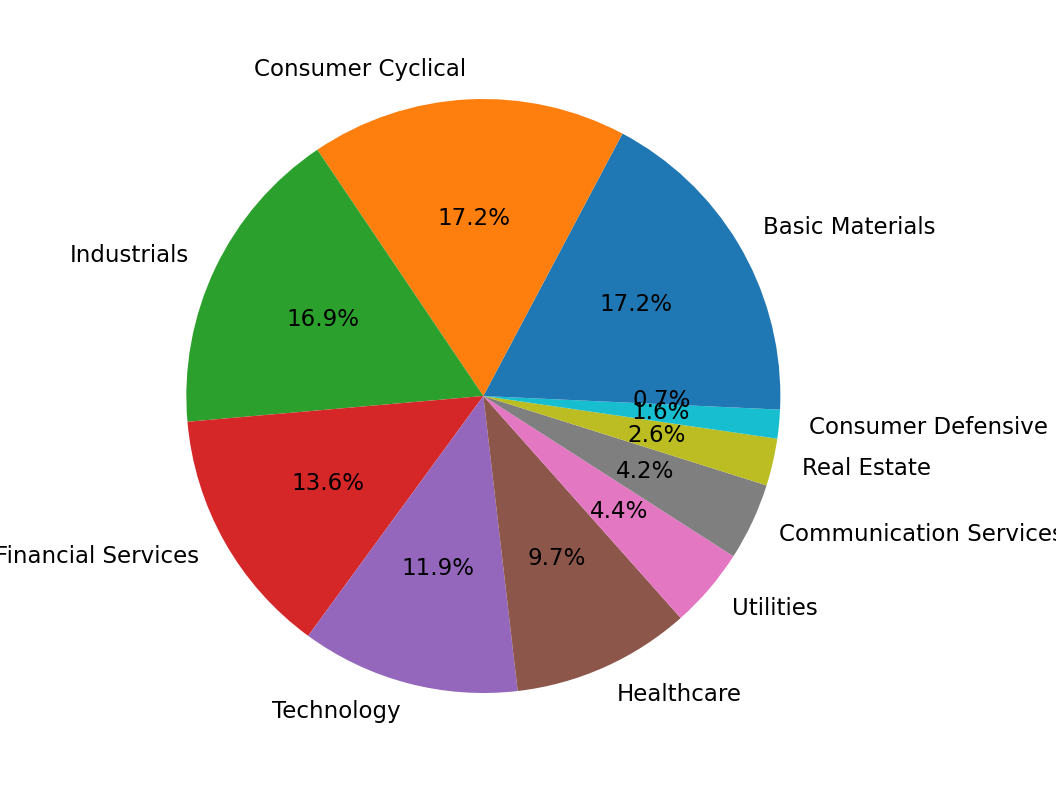

In [505]:
sectors = extract_key('sector')
gsec = group_cats(sectors)
seccolors = {sec:f'C{i}' for i,(sec,n) in enumerate(gsec)}
plot_pie(gsec, colors=seccolors);

In [449]:
# def get_logos(urls):
#     logos = {}
#     itr = tqdm(urls.items())
#     for name, url in itr:
#         itr.set_description(name)
#         try:
#             response = requests.get(url)
#             img = Image.open(BytesIO(response.content))
#         except:
#             img = None
#         logos[name] = img
#     return logos

In [450]:
# logos = get_logos(extract_key('logo_url'))
# display(*[logo for logo in logos.values() if logo is not None])

In [517]:
# in EUR
capital = 5000

In [518]:
autos = ['DAI.DE', 'VOW3.DE', 'BMW.DE', 'PAH3.DE', 'CON.DE']
blacklist = [
    'MTX.DE', 
    'ENR.DE',
    *autos
]
# blacklist = []

In [519]:
total = sum(x for tk, x in amounts.items() if closes[tk] is not None and tk not in blacklist)
ratios = {tk: val/total for tk, val in amounts.items() if closes[tk] is not None and tk not in blacklist}

In [520]:
closes = extract_key('previousClose')
nums = {tk:capital*r/closes[tk] for tk, r in ratios.items()}
print(tabulate(sorted(nums.items(), reverse=True, key=lambda item: (item[1], item[0])), headers=['Ticker', 'Price']))

Ticker        Price
--------  ---------
DTE.DE    14.3279
EOAN.DE    8.57031
DBK.DE     8.50665
IFX.DE     5.43706
SAP.DE     4.27046
BAYN.DE    4.08547
DPW.DE     3.97964
BAS.DE     3.81955
SIE.DE     3.12368
VNA.DE     2.94176
RWE.DE     2.83566
AIR.DE     2.37115
LIN.DE     1.91194
FRE.DE     1.72318
ALV.DE     1.69903
SHL.DE     1.14822
ZAL.DE     0.96853
FME.DE     0.821595
1COV.DE    0.801826
DB1.DE     0.768193
HEN3.DE    0.748955
ADS.DE     0.738884
HFG.DE     0.727794
DHER.DE    0.7222
BNR.DE     0.638418
HEI.DE     0.59122
MUV2.DE    0.584738
SY1.DE     0.562294
MRK.DE     0.532339
PUM.DE     0.420939
BEI.DE     0.408027
SRT3.DE    0.103587


In [521]:
quants = {tk:int(num) for tk, num in nums.items()}
expecting = {tk:(np.ceil(num)-num)*closes[tk] for tk, num in nums.items()}
available = sum((num-np.floor(num))*closes[tk] for tk, num in nums.items())
expecting = {tk:(np.ceil(num)-num)*closes[tk] for tk, num in nums.items()}
missing = sorted(expecting.items(), reverse=False, key=lambda item: (nums[item[0]]>1, item[1], item[0]))
for tk, val in missing:
    if available >= closes[tk]:
        quants[tk] += 1
        available -= closes[tk]
print(tabulate(sorted(quants.items(), reverse=True, key=lambda item: (item[1], item[0])), headers=['Ticker', 'Amount']))
issue = capital - (sum(closes[tk]*q for tk, q in quants.items()) + available)
msg = '(used all)' if np.allclose(issue, 0) else f'(missing {issue:.2f})'
print(f'Remainder: {available:.2f} {msg}')

Ticker      Amount
--------  --------
DTE.DE          15
EOAN.DE          9
DBK.DE           9
IFX.DE           5
SAP.DE           4
DPW.DE           4
BAYN.DE          4
VNA.DE           3
SIE.DE           3
RWE.DE           3
BAS.DE           3
FRE.DE           2
AIR.DE           2
ZAL.DE           1
SY1.DE           1
SHL.DE           1
PUM.DE           1
MUV2.DE          1
MRK.DE           1
LIN.DE           1
HFG.DE           1
HEN3.DE          1
HEI.DE           1
FME.DE           1
DHER.DE          1
DB1.DE           1
BNR.DE           1
BEI.DE           1
ALV.DE           1
ADS.DE           1
1COV.DE          1
SRT3.DE          0
Remainder: 5.47 (used all)


In [522]:
wts = {tk: q*closes[tk]/capital for tk, q in quants.items()}
# wts = {None: available/capital, **wts}
len(wts)

32

In [523]:
tkchange = percent_change(wts, ratios)
print(tabulate(sorted(tkchange.items(), reverse=True, key=lambda item: (item[1], item[0])), headers=['Ticker', 'Change']))

Ticker         Change
--------  -----------
BEI.DE     145.082
PUM.DE     137.564
MRK.DE      87.8502
SY1.DE      77.843
MUV2.DE     71.0167
HEI.DE      69.1418
BNR.DE      56.6372
DHER.DE     38.4658
HFG.DE      37.4014
ADS.DE      35.3393
HEN3.DE     33.5194
DB1.DE      30.1756
1COV.DE     24.7154
FME.DE      21.7145
FRE.DE      16.0643
DBK.DE       5.79961
RWE.DE       5.79549
EOAN.DE      5.01374
DTE.DE       4.69074
ZAL.DE       3.2493
VNA.DE       1.97963
DPW.DE       0.511681
BAYN.DE     -2.09216
SIE.DE      -3.95946
SAP.DE      -6.33318
IFX.DE      -8.03849
SHL.DE     -12.9088
AIR.DE     -15.6528
BAS.DE     -21.4568
ALV.DE     -41.1429
LIN.DE     -47.6971
SRT3.DE   -100


In [524]:
base = group_cats(sectors, ratios=ratios, silent=True)
sec_wts = group_cats(sectors, ratios=wts, silent=True)
sec_change = percent_change(dict(sec_wts), dict(base))
print(tabulate(sorted(sec_change.items(), reverse=True, key=lambda item: (item[1], item[0])), headers=['Ticker', 'Change']))

Ticker                       Change
----------------------  -----------
Consumer Defensive       78.2866
Consumer Cyclical        40.9265
Healthcare                8.99344
Utilities                 5.40356
Communication Services    4.69074
Real Estate               1.97963
Financial Services       -0.0246375
Industrials              -6.36604
Technology               -6.82901
Basic Materials         -20.4854


<IPython.core.display.Javascript object>


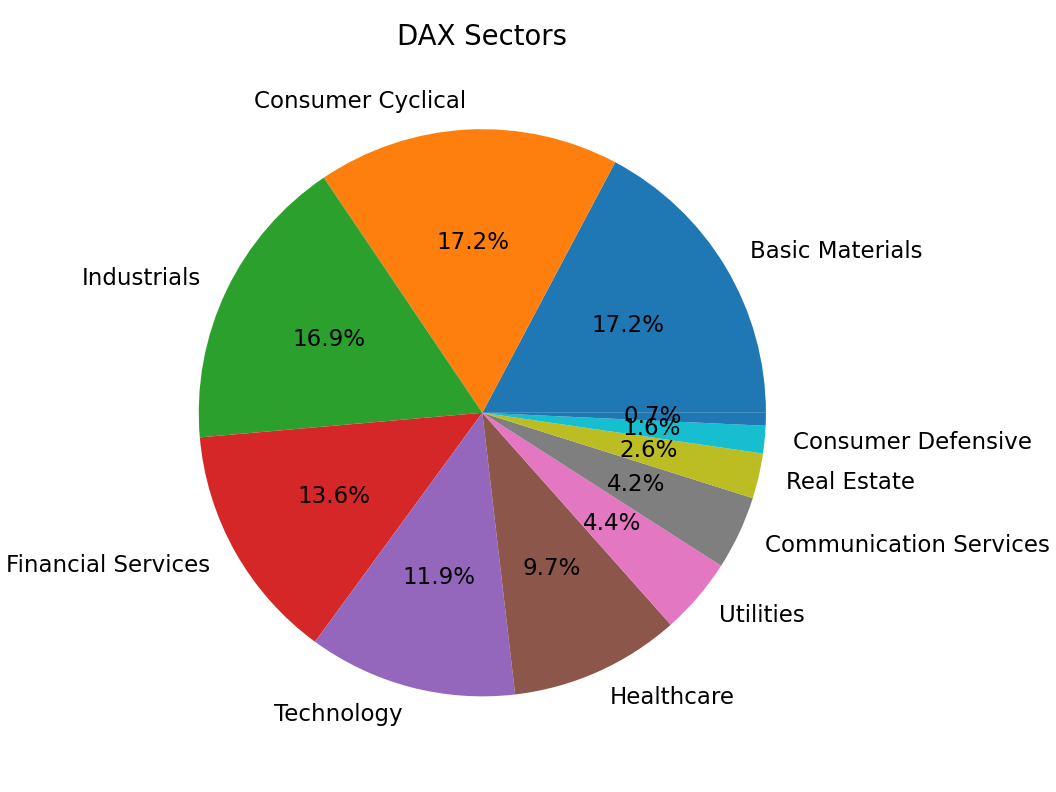

<IPython.core.display.Javascript object>


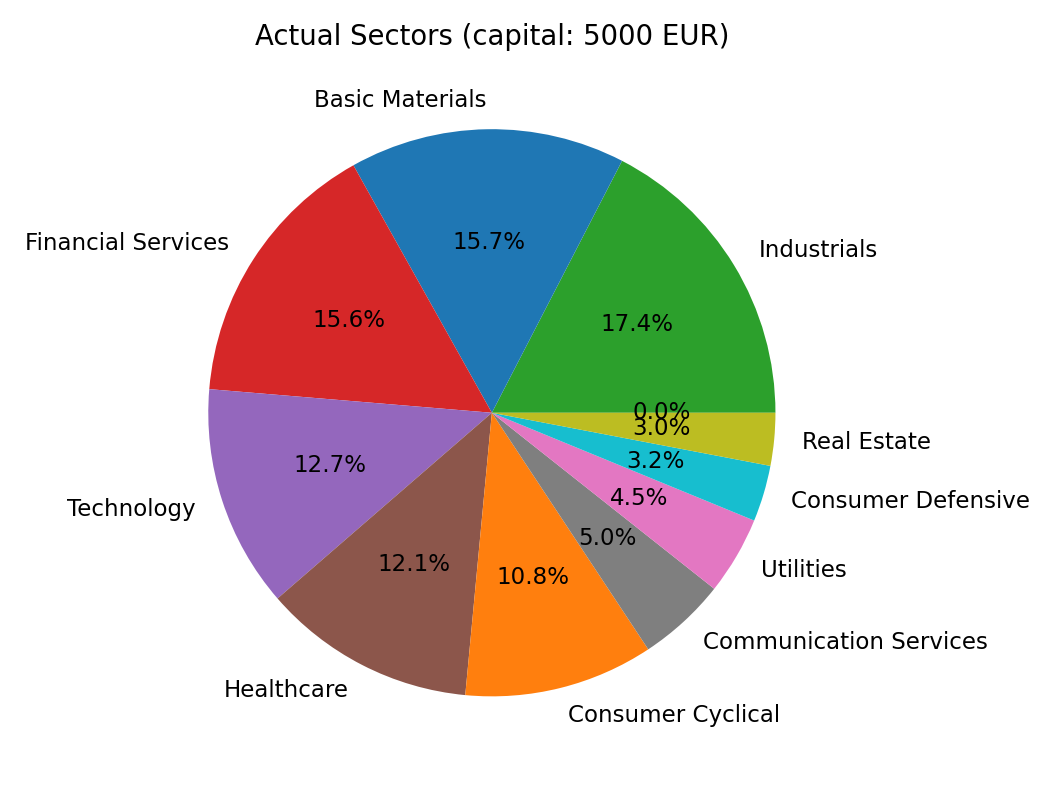

In [525]:
plot_pie(gsec, colors=seccolors);
plt.title('DAX Sectors')
plt.tight_layout();
plot_pie(sec_wts, colors=seccolors);
plt.title(f'Actual Sectors (capital: {capital} EUR)');
plt.tight_layout();

In [465]:
cols = ['ticker', '%', 'num',
        'yield',
#     'beta', 
        'trailingPE',
#         'trailingEps',
#         'earningsGrowth', 
        'change',
#         'totalCashPerShare',
        'shortName',
        'industry', 
        'sector', 
#         'longName', 
#         'longBusinessSummary'
       ]

data_tables = {
    'ticker': {tk:tk for tk in wts},
    'change': tkchange,
    '%': {tk:100*wt for tk,wt in wts.items()},
    'num': quants,
    'yield': {tk:(y*100 if y is not None else 0) for tk, y in extract_key('dividendYield').items()}
}

summary = extract_key('longBusinessSummary')
tbls = [(data_tables[k] if k in data_tables else extract_key(k)) for k in cols]
rows = [[(tbl.get(tk)) for tbl in tbls] for tk in wts]
# rows = [[*row[:-1], wrap(row[-1], 80)] for row in rows]
srt = 1
srt = cols.index('%')
print(tabulate(sorted(rows, reverse=True, key=lambda item: (item[srt] if item[srt] is not None else -100, item[0])), 
               headers=cols))

ticker           %    num    yield    trailingPE      change  shortName                        industry                                sector
--------  --------  -----  -------  ------------  ----------  -------------------------------  --------------------------------------  ----------------------
SAP.DE    9.41667       5     1.64      25.1345     -2.43039  SAP SE                           Software—Application                    Technology
LIN.DE    9.39          2     1.33      47.1332    -12.8285   LINDE PLC  EO 0,001              Specialty Chemicals                     Basic Materials
ALV.DE    7.57167       2     4.23      10.8766     -1.90485  ALLIANZ SE                       Insurance—Diversified                   Financial Services
SIE.DE    7.047         3     2.84      18.5236    -19.9662   SIEMENS AG                       Specialty Industrial Machinery          Industrials
DTE.DE    5.04         18     3.81      14.9477      4.69074  DEUTSCHE TELEKOM AG              Telecom

In [423]:
ylds = extract_key('dividendYield')
print(f'Yield: {100*sum(w*(0 if ylds.get(tk,0) is None else ylds.get(tk,0)) for tk, w in wts.items()):.2f}%')

Yield: 2.18%


In [424]:
print(wrap(summary['BEI.DE'], 120))

Beiersdorf Aktiengesellschaft engages in the manufacture and distribution of consumer goods in Europe, the Americas,
Africa, Asia, and Australia. It operates in two segments, Consumer Business and Tesa Business. The Consumer Business
Segment offers skin and body care products. The Tesa Business segment provides self-adhesive system and product
solutions for industries, craft businesses, and consumers. This segment offers its system solutions to the automotive,
electronics, printing and paper, and building and construction industries. The company offers its products under the
NIVEA, Eucerin, La Prairie, Elastoplast, Labello, Hansaplast, 8x4, FLORENA, Coppertone, HIDROFUGAL, GAMMON, SKIN
STORIES, FLORENA FERMENTED SKINCARE, STOP THE WATER WHILE USING ME, CHAUL, and TESA brands. Beiersdorf
Aktiengesellschaft was founded in 1882 and is headquartered in Hamburg, Germany. Beiersdorf Aktiengesellschaft is a
subsidiary of maxingvest ag.
